In [1]:
import pandas as pd

In [2]:
# 1.1 Load training dataset
training_set = pd.read_csv("TrainingSet_LRC_Mordred+RDKit_MACCS.csv")
training_set

,PUBCHEM_COMPOUND_CID,SMILES,LRC,LRC_risk,DataSet,ABC,ABCGG,nAcid,nBase,SpAbs_A,...,MACCS_157,MACCS_158,MACCS_159,MACCS_160,MACCS_161,MACCS_162,MACCS_163,MACCS_164,MACCS_165,MACCS_166
0,162364434,CN(c1ncnc2[nH]ccc12)C1CC(NS(=O)(=O)CCCO)C1,L4,1,TrainingSet,17.943136,14.971754,0,0,28.774953,...,1,1,1,1,1,1,1,1,1,0
1,1983,CC(=O)Nc1ccc(O)cc1,L1,0,TrainingSet,8.106344,7.427049,0,0,13.221782,...,1,1,1,1,1,1,1,1,1,0
2,1986,CC(=O)Nc1nnc(S(N)(=O)=O)s1,L2,0,TrainingSet,9.826314,9.493560,0,0,14.562939,...,0,1,1,1,1,1,0,1,1,0
3,60172,Nc1ncnc2c1ncn2CCOCP(=O)(O)O,L4,1,TrainingSet,13.899854,11.934332,2,0,21.952746,...,1,1,1,0,1,1,1,1,1,0
4,2082,CCCSc1ccc2nc(NC(=O)OC)[nH]c2c1,L2,0,TrainingSet,13.503979,11.402092,0,0,23.024209,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,5719,CCN(C(C)=O)c1cccc(-c2ccnc3c(C#N)cnn23)c1,L2,0,TrainingSet,17.653808,14.987006,0,0,29.702255,...,0,1,0,1,1,1,1,1,1,0
309,60855,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,L2,0,TrainingSet,16.936374,15.814768,1,3,27.059254,...,1,1,1,1,1,0,1,1,1,0
310,5734,NS(=O)(=O)Cc1noc2ccccc12,L4,1,TrainingSet,11.002477,9.956986,0,0,17.195940,...,0,0,1,0,1,1,1,1,1,0
311,5735,CN1CCN(C(=O)OC2c3nccnc3C(=O)N2c2ccc(Cl)cn2)CC1,L2,0,TrainingSet,21.367682,16.951718,0,1,35.484577,...,1,1,1,1,1,1,1,1,1,0


In [3]:
Xtrain = training_set.iloc[:, 5:]
Ytrain = training_set.iloc[:, 3]

# Display label distribution
print(Ytrain.value_counts())

LRC_risk
0    163
1    150
Name: count, dtype: int64


In [4]:
# 1.2 Load test dataset
test_set = pd.read_csv("TestSet_LRC_Mordred+RDKit_MACCS.csv")
test_set

,PUBCHEM_COMPOUND_CID,SMILES,LRC,LRC_risk,DataSet,ABC,ABCGG,nAcid,nBase,SpAbs_A,...,MACCS_157,MACCS_158,MACCS_159,MACCS_160,MACCS_161,MACCS_162,MACCS_163,MACCS_164,MACCS_165,MACCS_166
0,441300,Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1,L2,0,TestSet,16.918192,14.245522,0,0,27.928465,...,1,1,0,0,1,1,1,1,1,0
1,5284513,COc1cc(C)c(/C=C/C(C)=C/C=C/C(C)=C/C(=O)O)c(C)c1C,L5,1,TestSet,17.574531,15.186786,1,0,28.396881,...,1,0,1,1,0,1,1,1,1,0
2,135398513,Nc1nc2c(ncn2COCCO)c(=O)[nH]1,L2,0,TestSet,12.118275,10.788639,0,0,20.038433,...,1,1,1,0,1,1,1,1,1,0
3,60961,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O,L2,0,TestSet,14.894331,13.336359,0,0,24.631339,...,1,1,1,0,1,1,1,1,1,0
4,2083,CC(C)(C)NCC(O)c1ccc(O)c(CO)c1,L1,0,TestSet,12.635471,11.467932,0,1,19.933997,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,135398742,CC(C)[C@H](N)C(=O)OCCOCn1cnc2c(=O)[nH]c(N)nc21,L2,0,TestSet,17.424701,14.713083,0,1,28.210047,...,1,1,1,1,1,1,1,1,1,0
75,2520,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,L2,0,TestSet,24.165701,19.978681,0,1,41.742357,...,1,1,1,1,1,1,1,1,1,0
76,5362420,C=Cc1c(C)c2cc3nc(cc4[nH]c(cc5nc(cc1[nH]2)C(C)=...,L4,1,TestSet,41.335680,30.315950,1,0,67.286298,...,1,0,1,1,1,1,1,1,1,0
77,44424639,CCC1=C[C@@H]2CN(C1)Cc1c([nH]c3ccccc13)[C@@](C(...,L5,1,TestSet,45.666582,34.970393,0,2,75.391043,...,1,1,1,1,1,1,1,1,1,0


In [5]:
Xtest = test_set.iloc[:, 5:]
Ytest = test_set.iloc[:, 3]

In [6]:
# Display label distribution
print(Ytest.value_counts())

LRC_risk
0    48
1    31
Name: count, dtype: int64


In [10]:
# ============================================================================
# Feature Preprocessing Pipeline
# ============================================================================
# This notebook implements the feature preprocessing steps described in the methodology:
# 1. Missing value detection and removal
# 2. Z-score standardization (for molecular descriptors only)
# 3. Variance filtering (remove constant features)
# 4. Correlation-based filtering (remove highly correlated features)
# ============================================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import joblib
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# Step 1: Load Pre-split Data
# ============================================================================
# Note: X_train, Y_train, X_test, Y_test should be already loaded
# X_train and X_test contain both molecular descriptors and fingerprints
# Molecular descriptors: first 1383 columns
# Molecular fingerprints: remaining columns

print("=" * 80)
print("FEATURE PREPROCESSING PIPELINE")
print("=" * 80)
print(f"\nInitial dataset dimensions:")
print(f"Training set: {Xtrain.shape}")
print(f"Test set: {Xtest.shape}")
print(f"Training labels: {Ytrain.shape}")
print(f"Test labels: {Ytest.shape}")

# ============================================================================
# Step 2: Missing Value Detection and Removal
# ============================================================================
# Remove features (columns) with any missing values to ensure complete feature vectors

print("\n" + "=" * 80)
print("STEP 1: Missing Value Detection and Removal")
print("=" * 80)

# Check missing values in training set
train_missing_counts = Xtrain.isnull().sum()
train_cols_with_missing = train_missing_counts[train_missing_counts > 0]

print(f"Training set - Total missing values: {Xtrain.isnull().sum().sum()}")
print(f"Training set - Columns with missing values: {len(train_cols_with_missing)}")

# Check missing values in test set
test_missing_counts = Xtest.isnull().sum()
test_cols_with_missing = test_missing_counts[test_missing_counts > 0]

print(f"Test set - Total missing values: {Xtest.isnull().sum().sum()}")
print(f"Test set - Columns with missing values: {len(test_cols_with_missing)}")

# Identify columns with missing values in either training or test set
all_cols_with_missing = set(train_cols_with_missing.index) | set(test_cols_with_missing.index)

# Remove columns with missing values
if len(all_cols_with_missing) > 0:
    print(f"\nRemoving {len(all_cols_with_missing)} columns with missing values...")
    Xtrain = Xtrain.drop(columns=list(all_cols_with_missing))
    Xtest = Xtest.drop(columns=list(all_cols_with_missing))
    print(f"✓ Missing value columns removed")
else:
    print("\n✓ No missing values detected")

print(f"\nDataset dimensions after missing value removal:")
print(f"Training set: {Xtrain.shape}")
print(f"Test set: {Xtest.shape}")

# ============================================================================
# Step 3: Define Feature Type Boundaries
# ============================================================================
# Separate molecular descriptors from molecular fingerprints
# Descriptors require standardization; fingerprints do not

N_DESCRIPTORS = 1383  # Number of molecular descriptor features
# Update descriptor columns based on remaining features
descriptor_cols = [col for col in Xtrain.columns[:N_DESCRIPTORS] if col in Xtrain.columns]
fingerprint_cols = [col for col in Xtrain.columns if col not in descriptor_cols]

print(f"\nFeature composition after missing value removal:")
print(f"Molecular descriptors: {len(descriptor_cols)} features")
print(f"Molecular fingerprints: {len(fingerprint_cols)} features")

# ============================================================================
# Step 4: Z-score Standardization
# ============================================================================
# Apply standardization to molecular descriptors only
# Molecular fingerprints are binary and do not require standardization

print("\n" + "=" * 80)
print("STEP 2: Z-score Standardization")
print("=" * 80)
print("Standardizing molecular descriptors only...")
print("Fingerprints will not be standardized")

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize descriptor features only
Xtrain_desc_std = scaler.fit_transform(Xtrain[descriptor_cols])
Xtest_desc_std = scaler.transform(Xtest[descriptor_cols])

# Convert standardized arrays back to DataFrames
Xtrain_desc_std = pd.DataFrame(
    Xtrain_desc_std, 
    columns=descriptor_cols, 
    index=Xtrain.index
)
Xtest_desc_std = pd.DataFrame(
    Xtest_desc_std, 
    columns=descriptor_cols, 
    index=Xtest.index
)

# Combine standardized descriptors with original fingerprints
Xtrain_std = pd.concat([Xtrain_desc_std, Xtrain[fingerprint_cols]], axis=1)
Xtest_std = pd.concat([Xtest_desc_std, Xtest[fingerprint_cols]], axis=1)

# Save the scaler for future use
joblib.dump(scaler, 'scaler.pkl')
print("✓ Standardization completed")
print("✓ Scaler saved to 'scaler.pkl'")

# ============================================================================
# Step 5: Variance Filtering
# ============================================================================
# Remove constant features (variance = 0) that provide no discriminative information

print("\n" + "=" * 80)
print("STEP 3: Variance Filtering")
print("=" * 80)
print("Removing features with zero variance...")

# Initialize VarianceThreshold selector
variance_selector = VarianceThreshold(threshold=0.0)
variance_selector.fit(Xtrain_std)

# Identify features with non-zero variance
non_zero_variance_features = Xtrain_std.columns[variance_selector.variances_ != 0].tolist()
zero_variance_count = Xtrain_std.shape[1] - len(non_zero_variance_features)

# Filter features
Xtrain_var = Xtrain_std[non_zero_variance_features]
Xtest_var = Xtest_std[non_zero_variance_features]

print(f"✓ Removed {zero_variance_count} zero-variance features")
print(f"Remaining features: {Xtrain_var.shape[1]}")

# ============================================================================
# Step 6: Correlation-based Filtering
# ============================================================================
# Remove highly correlated features (Pearson correlation > 0.9)
# For correlated pairs, retain the feature with higher target correlation

print("\n" + "=" * 80)
print("STEP 4: Correlation-based Filtering")
print("=" * 80)
print("Removing highly correlated features (r > 0.9)...")

# Calculate correlation matrix
corr_matrix = Xtrain_var.corr().abs()

# Extract upper triangle of correlation matrix
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find features with correlation > 0.9
highly_correlated_features = []
for column in upper_triangle.columns:
    if any(upper_triangle[column] > 0.9):
        highly_correlated_features.append(column)

# Remove highly correlated features
Xtrain_processed = Xtrain_var.drop(columns=highly_correlated_features)
Xtest_processed = Xtest_var.drop(columns=highly_correlated_features)

print(f"✓ Removed {len(highly_correlated_features)} highly correlated features")
print(f"Remaining features: {Xtrain_processed.shape[1]}")

# ============================================================================
# Step 7: Summary and Save Processed Data
# ============================================================================

print("\n" + "=" * 80)
print("PREPROCESSING SUMMARY")
print("=" * 80)
print(f"Original features: {Xtrain.shape[1]} (after missing value removal)")
print(f"After variance filtering: {Xtrain_var.shape[1]}")
print(f"After correlation filtering: {Xtrain_processed.shape[1]}")
print(f"Total features removed: {Xtrain.shape[1] - Xtrain_processed.shape[1]}")
print(f"Feature reduction rate: {(1 - Xtrain_processed.shape[1]/Xtrain.shape[1])*100:.2f}%")

# Save processed features
print("\nSaving processed features...")
Xtrain_processed.to_csv("X_train_processed.csv", index=False)
Xtest_processed.to_csv("X_test_processed.csv", index=False)
Ytrain.to_csv("Y_train.csv", index=False)
Ytest.to_csv("Y_test.csv", index=False)

print("✓ Processed training features saved to 'X_train_processed.csv'")
print("✓ Processed test features saved to 'X_test_processed.csv'")
print("✓ Training labels saved to 'Y_train.csv'")
print("✓ Test labels saved to 'Y_test.csv'")

print("\n" + "=" * 80)
print("PREPROCESSING COMPLETED SUCCESSFULLY")
print("=" * 80)

# Display first few rows of processed data
print("\nProcessed training data preview:")
print(Xtrain_processed.head())

FEATURE PREPROCESSING PIPELINE

Initial dataset dimensions:
Training set: (313, 1549)
Test set: (79, 1549)
Training labels: (313,)
Test labels: (79,)

STEP 1: Missing Value Detection and Removal
Training set - Total missing values: 0
Training set - Columns with missing values: 0
Test set - Total missing values: 0
Test set - Columns with missing values: 0

✓ No missing values detected

Dataset dimensions after missing value removal:
Training set: (313, 1549)
Test set: (79, 1549)

Feature composition after missing value removal:
Molecular descriptors: 1383 features
Molecular fingerprints: 166 features

STEP 2: Z-score Standardization
Standardizing molecular descriptors only...
Fingerprints will not be standardized
✓ Standardization completed
✓ Scaler saved to 'scaler.pkl'

STEP 3: Variance Filtering
Removing features with zero variance...
✓ Removed 166 zero-variance features
Remaining features: 1383

STEP 4: Correlation-based Filtering
Removing highly correlated features (r > 0.9)...
✓ R

In [12]:
# ============================================================================
# Hyperparameter Optimization for Random Forest Base Model
# ============================================================================
# This section optimizes Random Forest hyperparameters using Hyperopt with TPE algorithm
# Optimization is performed only on training set with 10-fold cross-validation
# Objective: Maximize Matthews Correlation Coefficient (MCC)
# The optimized model will serve as base estimator for subsequent feature selection
# ============================================================================

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, matthews_corrcoef
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.early_stop import no_progress_loss
import joblib
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("RANDOM FOREST HYPERPARAMETER OPTIMIZATION")
print("=" * 80)

# ============================================================================
# Step 1: Load Preprocessed Features
# ============================================================================

print("\nLoading preprocessed features...")
Xtrain_processed = pd.read_csv("X_train_processed.csv")
Ytrain = pd.read_csv("Y_train.csv").values.ravel()

print(f"Training set: {Xtrain_processed.shape}")
print(f"Training labels distribution: {np.bincount(Ytrain)}")

# ============================================================================
# Step 2: Define Hyperparameter Optimization Framework
# ============================================================================

print("\n" + "=" * 80)
print("HYPERPARAMETER OPTIMIZATION SETUP")
print("=" * 80)

# Define objective function for Hyperopt
def hyperopt_objective(params):
    """
    Objective function for hyperparameter optimization
    Returns negative MCC (to minimize) from 10-fold cross-validation
    """
    rf_model = RandomForestClassifier(
        n_estimators=int(params["n_estimators"]),
        criterion=params["criterion"],
        max_depth=int(params["max_depth"]),
        max_features=params["max_features"],
        random_state=1,
        n_jobs=-1
    )
    
    # 10-fold cross-validation
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    cv_results = cross_validate(
        rf_model, 
        Xtrain_processed, 
        Ytrain,
        cv=cv, 
        scoring="matthews_corrcoef",
        n_jobs=-1,
        error_score="raise"
    )
    
    # Return negative MCC (Hyperopt minimizes)
    return -np.mean(cv_results["test_score"])

# Define hyperparameter search space
param_space = {
    'n_estimators': hp.quniform("n_estimators", 40, 250, 1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    'max_depth': hp.quniform("max_depth", 5, 20, 1),
    "max_features": hp.choice("max_features", ["sqrt", "log2"] + list(range(10, 60)))
}

# Define hyperparameter optimization process
def optimize_hyperparameters(max_evals=250):
    """
    Perform hyperparameter optimization using TPE algorithm
    
    Args:
        max_evals: Maximum number of evaluations
        
    Returns:
        best_params: Best hyperparameters found
        trials: Optimization trials history
    """
    trials = Trials()
    early_stop_fn = no_progress_loss(400)
    
    print(f"\nStarting Bayesian optimization with TPE algorithm...")
    print(f"Maximum evaluations: {max_evals}")
    print(f"Optimization metric: Matthews Correlation Coefficient (MCC)")
    print(f"Cross-validation: 10-fold")
    
    best_params = fmin(
        fn=hyperopt_objective,
        space=param_space,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=trials,
        early_stop_fn=early_stop_fn,
        verbose=True
    )
    
    print("\n" + "=" * 80)
    print("OPTIMIZATION COMPLETED")
    print("=" * 80)
    print(f"\nBest parameters found: {best_params}")
    
    return best_params, trials

# ============================================================================
# Step 3: Hyperparameter Optimization (Optional)
# ============================================================================
# Note: This cell performs the actual optimization
# Comment out if you want to skip optimization and use pre-defined best parameters

# Uncomment the following lines to run optimization
# print("\nNote: Hyperparameter optimization may take considerable time...")
# print("The optimization process will be displayed below:\n")
# params_best, trials = optimize_hyperparameters(max_evals=250)

# ============================================================================
# Step 4: Build Model with Best Parameters
# ============================================================================

print("\n" + "=" * 80)
print("BUILDING OPTIMIZED RANDOM FOREST MODEL")
print("=" * 80)

# Best parameters from previous optimization
# These parameters were obtained from hyperparameter optimization
best_params = {
    'n_estimators': 76,
    'criterion': 'entropy',
    'max_depth': 17,
    'max_features': 22
}

print("\nBest hyperparameters:")
for param, value in best_params.items():
    print(f"  {param}: {value}")

# Initialize Random Forest with best parameters
rf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    random_state=1,
    n_jobs=-1
)

# ============================================================================
# Step 5: 10-Fold Cross-Validation Evaluation
# ============================================================================

print("\n" + "=" * 80)
print("10-FOLD CROSS-VALIDATION EVALUATION")
print("=" * 80)

# Define custom scoring functions
def sensitivity_score(y_true, y_pred):
    """Calculate sensitivity (recall)"""
    from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

def specificity_score(y_true, y_pred):
    """Calculate specificity"""
    from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Define scoring metrics
scoring = {
    'AUC': 'roc_auc',
    'ACC': 'accuracy',
    'SEN': make_scorer(sensitivity_score),
    'SPE': make_scorer(specificity_score),
    'MCC': make_scorer(matthews_corrcoef)
}

# Perform 10-fold cross-validation
print("\nPerforming 10-fold cross-validation on training set...")
cv = KFold(n_splits=10, shuffle=True, random_state=1)
cv_results = cross_validate(
    rf_best,
    Xtrain_processed,
    Ytrain,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

# Calculate mean and std for each metric
cv_summary = pd.DataFrame({
    'Metric': ['AUC', 'ACC', 'SEN', 'SPE', 'MCC'],
    'Mean': [
        cv_results['test_AUC'].mean(),
        cv_results['test_ACC'].mean(),
        cv_results['test_SEN'].mean(),
        cv_results['test_SPE'].mean(),
        cv_results['test_MCC'].mean()
    ],
    'Std': [
        cv_results['test_AUC'].std(),
        cv_results['test_ACC'].std(),
        cv_results['test_SEN'].std(),
        cv_results['test_SPE'].std(),
        cv_results['test_MCC'].std()
    ]
})

print("\n10-Fold Cross-Validation Results (Training Set):")
print("=" * 60)
for idx, row in cv_summary.iterrows():
    print(f"{row['Metric']}: {row['Mean']:.4f} ± {row['Std']:.4f}")
print("=" * 60)

# Save CV results
cv_summary.to_csv('rf_cv_results.csv', index=False)
print("\n✓ Cross-validation results saved to 'rf_cv_results.csv'")

# ============================================================================
# Step 6: Train Final Model on Full Training Set
# ============================================================================

print("\n" + "=" * 80)
print("TRAINING FINAL MODEL")
print("=" * 80)

print("\nTraining Random Forest on full training set...")
rf_best.fit(Xtrain_processed, Ytrain)
print("✓ Model training completed")

# ============================================================================
# Step 7: Save Optimized Model
# ============================================================================

print("\n" + "=" * 80)
print("SAVING OPTIMIZED MODEL")
print("=" * 80)

# Save the trained model
joblib.dump(rf_best, 'rf_optimized_model.pkl')
print("✓ Optimized Random Forest model saved to 'rf_optimized_model.pkl'")

# Save best parameters
params_df = pd.DataFrame([best_params])
params_df.to_csv('rf_best_parameters.csv', index=False)
print("✓ Best parameters saved to 'rf_best_parameters.csv'")

print("\n" + "=" * 80)
print("RANDOM FOREST OPTIMIZATION COMPLETED")
print("=" * 80)
print("\nThe optimized model is ready for feature selection in the next step.")


RANDOM FOREST HYPERPARAMETER OPTIMIZATION

Loading preprocessed features...
Training set: (313, 572)
Training labels distribution: [163 150]

HYPERPARAMETER OPTIMIZATION SETUP

BUILDING OPTIMIZED RANDOM FOREST MODEL

Best hyperparameters:
  n_estimators: 76
  criterion: entropy
  max_depth: 17
  max_features: 22

10-FOLD CROSS-VALIDATION EVALUATION

Performing 10-fold cross-validation on training set...

10-Fold Cross-Validation Results (Training Set):
AUC: 0.7289 ± 0.0819
ACC: 0.7001 ± 0.0770
SEN: 0.6496 ± 0.0867
SPE: 0.7614 ± 0.1402
MCC: 0.4149 ± 0.1633

✓ Cross-validation results saved to 'rf_cv_results.csv'

TRAINING FINAL MODEL

Training Random Forest on full training set...
✓ Model training completed

SAVING OPTIMIZED MODEL
✓ Optimized Random Forest model saved to 'rf_optimized_model.pkl'
✓ Best parameters saved to 'rf_best_parameters.csv'

RANDOM FOREST OPTIMIZATION COMPLETED

The optimized model is ready for feature selection in the next step.


In [ ]:
# ============================================================================
# Feature Selection using Genetic Algorithm (GA)
# ============================================================================
# This section implements feature selection using Genetic Algorithm
# GA employs evolutionary computation principles to optimize feature combinations
# Parameters: population_size=50, generations=40, crossover_prob=0.5, mutation_prob=0.2
# Fitness evaluation: 10-fold cross-validation MCC on training set
# ============================================================================

import numpy as np
import pandas as pd
import random
from deap import base, creator, tools, algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.metrics import matthews_corrcoef, make_scorer
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.early_stop import no_progress_loss
import joblib
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("FEATURE SELECTION - GENETIC ALGORITHM")
print("=" * 80)

# ============================================================================
# Step 1: Load Preprocessed Data and Base Model
# ============================================================================

print("\nLoading preprocessed features and optimized model...")
Xtrain_processed = pd.read_csv("X_train_processed.csv")
Ytrain = pd.read_csv("Y_train.csv").values.ravel()
rf_base = joblib.load('rf_optimized_model.pkl')

print(f"Training set: {Xtrain_processed.shape}")
print(f"Training labels distribution: {np.bincount(Ytrain)}")

# Set random seeds for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# Convert to numpy arrays
X_train = Xtrain_processed.values
y_train = Ytrain
feature_names = Xtrain_processed.columns

# ============================================================================
# Step 2: Define Genetic Algorithm Framework
# ============================================================================

print("\n" + "=" * 80)
print("GENETIC ALGORITHM SETUP")
print("=" * 80)

# GA parameters
NUM_GENES = X_train.shape[1]  # Number of genes equals number of features
POP_SIZE = 50  # Population size
NGEN = 40  # Number of generations
CXPB = 0.5  # Crossover probability
MUTPB = 0.2  # Mutation probability

print(f"\nGenetic Algorithm Parameters:")
print(f"  Population size: {POP_SIZE}")
print(f"  Number of generations: {NGEN}")
print(f"  Crossover probability: {CXPB}")
print(f"  Mutation probability: {MUTPB}")
print(f"  Number of features: {NUM_GENES}")

# Define evaluation function
def evaluate_individual(individual):
    """
    Evaluate fitness of an individual (feature subset)
    
    Args:
        individual: Binary list indicating selected features (1=selected, 0=not selected)
        
    Returns:
        Tuple containing mean MCC from 10-fold cross-validation
    """
    selected_features = [index for index, value in enumerate(individual) if value == 1]
    
    # Return worst score if no features selected
    if not selected_features:
        return -1.0,
    
    # Select features
    X_train_selected = X_train[:, selected_features]
    
    # Initialize Random Forest with optimized parameters
    clf = RandomForestClassifier(
        n_estimators=76,
        criterion="entropy",
        max_depth=17,
        max_features=22,
        random_state=RANDOM_SEED,
        n_jobs=-1
    )
    
    # Perform 10-fold cross-validation
    mcc_scorer = make_scorer(matthews_corrcoef)
    scores = cross_val_score(clf, X_train_selected, y_train, 
                            cv=10, scoring=mcc_scorer, n_jobs=-1)
    
    return scores.mean(),

# Define DEAP genetic algorithm components
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, 
                toolbox.attr_bool, n=NUM_GENES)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Hall of Fame to store best individual
hof = tools.HallOfFame(1)

# ============================================================================
# Step 3: Run Genetic Algorithm (Optional)
# ============================================================================
# Note: GA optimization may take considerable time
# Comment out if you want to skip and use pre-defined feature subset

# Uncomment the following lines to run GA
# print("\n" + "=" * 80)
# print("RUNNING GENETIC ALGORITHM")
# print("=" * 80)
# print("\nNote: This process may take considerable time...")
# print("Progress will be displayed below:\n")
# 
# # Generate initial population
# population = toolbox.population(n=POP_SIZE)
# 
# # Run genetic algorithm
# result_population, logbook = algorithms.eaSimple(
#     population, toolbox, 
#     cxpb=CXPB, 
#     mutpb=MUTPB, 
#     ngen=NGEN,
#     stats=None, 
#     halloffame=hof, 
#     verbose=True
# )
# 
# # Get best individual
# best_individual = hof[0]
# selected_feature_indices = [index for index, value in enumerate(best_individual) if value == 1]
# selected_feature_names = feature_names[selected_feature_indices]
# 
# print("\n" + "=" * 80)
# print("GA OPTIMIZATION COMPLETED")
# print("=" * 80)
# print(f"\nNumber of selected features: {len(selected_feature_indices)}")
# print(f"Best MCC on training set (10-fold CV): {evaluate_individual(best_individual)[0]:.4f}")
# 
# # Save selected features
# pd.DataFrame({'Selected_Features': selected_feature_names}).to_csv('ga_selected_features.csv', index=False)
# print("✓ Selected features saved to 'ga_selected_features.csv'")

# ============================================================================
# Step 4: Load Selected Features from GA
# ============================================================================
# Using pre-defined selected features from GA optimization

print("\n" + "=" * 80)
print("LOADING GA-SELECTED FEATURES")
print("=" * 80)

# Load selected features (replace with actual selected features from GA)
# This is a placeholder - replace with actual feature names from GA results
ga_selected_features = pd.read_csv('ga_selected_features.csv')['Selected_Features'].tolist()

print(f"\nNumber of GA-selected features: {len(ga_selected_features)}")

# Filter training data with selected features
X_train_ga = Xtrain_processed[ga_selected_features]

print(f"Training set with GA-selected features: {X_train_ga.shape}")

# ============================================================================
# Step 5: Hyperparameter Optimization on GA-Selected Features
# ============================================================================

print("\n" + "=" * 80)
print("HYPERPARAMETER OPTIMIZATION ON GA-SELECTED FEATURES")
print("=" * 80)

# Define objective function for hyperparameter optimization
def hyperopt_objective_ga(params):
    """
    Objective function for hyperparameter optimization on GA-selected features
    Returns negative MCC from 10-fold cross-validation
    """
    rf_model = RandomForestClassifier(
        n_estimators=int(params["n_estimators"]),
        criterion=params["criterion"],
        max_depth=int(params["max_depth"]),
        max_features=params["max_features"],
        random_state=RANDOM_SEED,
        n_jobs=-1
    )
    
    # 10-fold cross-validation
    cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
    cv_results = cross_validate(
        rf_model,
        X_train_ga,
        Ytrain,
        cv=cv,
        scoring="matthews_corrcoef",
        n_jobs=-1,
        error_score="raise"
    )
    
    return -np.mean(cv_results["test_score"])

# Define hyperparameter search space
param_space_ga = {
    'n_estimators': hp.quniform("n_estimators", 40, 250, 1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    'max_depth': hp.quniform("max_depth", 5, 20, 1),
    "max_features": hp.choice("max_features", ["sqrt", "log2"] + list(range(10, 60)))
}

# Define optimization process
def optimize_hyperparameters_ga(max_evals=250):
    """
    Perform hyperparameter optimization on GA-selected features
    
    Args:
        max_evals: Maximum number of evaluations
        
    Returns:
        best_params: Best hyperparameters found
        trials: Optimization trials history
    """
    trials = Trials()
    early_stop_fn = no_progress_loss(400)
    
    print(f"\nStarting hyperparameter optimization on GA-selected features...")
    print(f"Maximum evaluations: {max_evals}")
    print(f"Optimization metric: Matthews Correlation Coefficient (MCC)")
    print(f"Cross-validation: 10-fold")
    
    best_params = fmin(
        fn=hyperopt_objective_ga,
        space=param_space_ga,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=trials,
        early_stop_fn=early_stop_fn,
        verbose=True
    )
    
    print("\n" + "=" * 80)
    print("OPTIMIZATION COMPLETED")
    print("=" * 80)
    print(f"\nBest parameters found: {best_params}")
    
    return best_params, trials

# Uncomment to run hyperparameter optimization
# print("\nNote: Hyperparameter optimization may take considerable time...")
# params_best_ga, trials_ga = optimize_hyperparameters_ga(max_evals=250)

# ============================================================================
# Step 6: Build Model with Best Parameters on GA-Selected Features
# ============================================================================

print("\n" + "=" * 80)
print("BUILDING OPTIMIZED MODEL WITH GA-SELECTED FEATURES")
print("=" * 80)

# Best parameters from optimization on GA-selected features
# Replace with actual optimized parameters
best_params_ga = {
    'n_estimators': 80,
    'criterion': 'entropy',
    'max_depth': 15,
    'max_features': 18
}

print("\nBest hyperparameters for GA-selected features:")
for param, value in best_params_ga.items():
    print(f"  {param}: {value}")

# Initialize Random Forest with best parameters
rf_ga_best = RandomForestClassifier(
    n_estimators=best_params_ga['n_estimators'],
    criterion=best_params_ga['criterion'],
    max_depth=best_params_ga['max_depth'],
    max_features=best_params_ga['max_features'],
    random_state=RANDOM_SEED,
    n_jobs=-1
)

# ============================================================================
# Step 7: 10-Fold Cross-Validation Evaluation
# ============================================================================

print("\n" + "=" * 80)
print("10-FOLD CROSS-VALIDATION EVALUATION (GA-SELECTED FEATURES)")
print("=" * 80)

# Define custom scoring functions
def sensitivity_score(y_true, y_pred):
    from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

def specificity_score(y_true, y_pred):
    from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Define scoring metrics
scoring = {
    'AUC': 'roc_auc',
    'ACC': 'accuracy',
    'SEN': make_scorer(sensitivity_score),
    'SPE': make_scorer(specificity_score),
    'MCC': make_scorer(matthews_corrcoef)
}

# Perform 10-fold cross-validation
print("\nPerforming 10-fold cross-validation...")
cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
cv_results_ga = cross_validate(
    rf_ga_best,
    X_train_ga,
    Ytrain,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

# Calculate mean and std for each metric
cv_summary_ga = pd.DataFrame({
    'Metric': ['AUC', 'ACC', 'SEN', 'SPE', 'MCC'],
    'Mean': [
        cv_results_ga['test_AUC'].mean(),
        cv_results_ga['test_ACC'].mean(),
        cv_results_ga['test_SEN'].mean(),
        cv_results_ga['test_SPE'].mean(),
        cv_results_ga['test_MCC'].mean()
    ],
    'Std': [
        cv_results_ga['test_AUC'].std(),
        cv_results_ga['test_ACC'].std(),
        cv_results_ga['test_SEN'].std(),
        cv_results_ga['test_SPE'].std(),
        cv_results_ga['test_MCC'].std()
    ]
})

print("\n10-Fold Cross-Validation Results (GA-Selected Features):")
print("=" * 60)
for idx, row in cv_summary_ga.iterrows():
    print(f"{row['Metric']}: {row['Mean']:.4f} ± {row['Std']:.4f}")
print("=" * 60)

# Save CV results
cv_summary_ga.to_csv('rf_ga_cv_results.csv', index=False)
print("\n✓ Cross-validation results saved to 'rf_ga_cv_results.csv'")

# ============================================================================
# Step 8: Train Final Model and Save
# ============================================================================

print("\n" + "=" * 80)
print("TRAINING FINAL MODEL")
print("=" * 80)

print("\nTraining Random Forest on full training set with GA-selected features...")
rf_ga_best.fit(X_train_ga, Ytrain)
print("✓ Model training completed")

# Save the trained model
joblib.dump(rf_ga_best, 'rf_ga_optimized_model.pkl')
print("✓ Model saved to 'rf_ga_optimized_model.pkl'")

# Save GA-selected training data
X_train_ga.to_csv('X_train_ga_selected.csv', index=False)
print("✓ GA-selected training features saved to 'X_train_ga_selected.csv'")

# Save best parameters
params_ga_df = pd.DataFrame([best_params_ga])
params_ga_df.to_csv('rf_ga_best_parameters.csv', index=False)
print("✓ Best parameters saved to 'rf_ga_best_parameters.csv'")

print("\n" + "=" * 80)
print("GA FEATURE SELECTION COMPLETED")
print("=" * 80)
print("\nThe GA-optimized model is ready for further evaluation.")

In [ ]:
# ============================================================================
# Feature Selection using Recursive Feature Elimination with Cross-Validation (RFECV)
# ============================================================================
# This section implements feature selection using RFECV
# RFECV performs backward feature elimination by iteratively removing the least
# important features according to model-specific feature rankings
# Optimal number of features is automatically determined through cross-validation
# ============================================================================

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import matthews_corrcoef, make_scorer
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.early_stop import no_progress_loss
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("FEATURE SELECTION - RFECV")
print("=" * 80)

# ============================================================================
# Step 1: Load Preprocessed Data and Base Model
# ============================================================================

print("\nLoading preprocessed features and optimized model...")
Xtrain_processed = pd.read_csv("X_train_processed.csv")
Ytrain = pd.read_csv("Y_train.csv").values.ravel()
rf_base = joblib.load('rf_optimized_model.pkl')

print(f"Training set: {Xtrain_processed.shape}")
print(f"Training labels distribution: {np.bincount(Ytrain)}")

# Set random seed
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# ============================================================================
# Step 2: RFECV Feature Selection
# ============================================================================

print("\n" + "=" * 80)
print("RFECV FEATURE SELECTION")
print("=" * 80)

print("\nRFECV Parameters:")
print(f"  Base estimator: Random Forest (optimized)")
print(f"  Step: 1 (remove 1 feature per iteration)")
print(f"  Cross-validation: 10-fold")
print(f"  Scoring metric: Matthews Correlation Coefficient (MCC)")

# Initialize RFECV with optimized Random Forest as base estimator
print("\nPerforming RFECV feature selection...")
print("Note: This process may take considerable time...\n")

rfecv_selector = RFECV(
    estimator=rf_base,
    step=1,
    cv=KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED),
    scoring="matthews_corrcoef",
    n_jobs=-1,
    verbose=1
)

# Fit RFECV
rfecv_selector.fit(Xtrain_processed, Ytrain)

print("\n" + "=" * 80)
print("RFECV SELECTION COMPLETED")
print("=" * 80)

# Get selected features
selected_features_mask = rfecv_selector.support_
selected_feature_names = Xtrain_processed.columns[selected_features_mask].tolist()
n_features_selected = rfecv_selector.n_features_

print(f"\nOptimal number of features: {n_features_selected}")
print(f"Original number of features: {Xtrain_processed.shape[1]}")
print(f"Features removed: {Xtrain_processed.shape[1] - n_features_selected}")

# Save selected features
pd.DataFrame({'Selected_Features': selected_feature_names}).to_csv(
    'rfecv_selected_features.csv', index=False
)
print("✓ Selected features saved to 'rfecv_selected_features.csv'")

# ============================================================================
# Step 3: Visualize RFECV Results
# ============================================================================

print("\n" + "=" * 80)
print("RFECV PERFORMANCE VISUALIZATION")
print("=" * 80)

# Plot number of features vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv_selector.cv_results_['mean_test_score']) + 1),
         rfecv_selector.cv_results_['mean_test_score'],
         marker='o', linestyle='-', linewidth=2, markersize=5)
plt.axvline(x=n_features_selected, color='r', linestyle='--', linewidth=2,
           label=f'Optimal features = {n_features_selected}')
plt.xlabel('Number of Features Selected', fontsize=12)
plt.ylabel('Cross-Validation MCC Score', fontsize=12)
plt.title('RFECV: Feature Selection Performance', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('rfecv_feature_selection_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ RFECV curve saved to 'rfecv_feature_selection_curve.png'")

# Display performance statistics
print(f"\nBest cross-validation MCC: {rfecv_selector.cv_results_['mean_test_score'].max():.4f}")
print(f"MCC at optimal features: {rfecv_selector.cv_results_['mean_test_score'][n_features_selected-1]:.4f}")

# ============================================================================
# Step 4: Create Training Data with RFECV-Selected Features
# ============================================================================

print("\n" + "=" * 80)
print("PREPARING RFECV-SELECTED FEATURE DATA")
print("=" * 80)

# Filter training data with selected features
X_train_rfecv = Xtrain_processed[selected_feature_names]

print(f"\nTraining set with RFECV-selected features: {X_train_rfecv.shape}")

# Save RFECV-selected training data
X_train_rfecv.to_csv('X_train_rfecv_selected.csv', index=False)
print("✓ RFECV-selected training features saved to 'X_train_rfecv_selected.csv'")

# ============================================================================
# Step 5: Hyperparameter Optimization on RFECV-Selected Features
# ============================================================================

print("\n" + "=" * 80)
print("HYPERPARAMETER OPTIMIZATION ON RFECV-SELECTED FEATURES")
print("=" * 80)

# Define objective function
def hyperopt_objective_rfecv(params):
    """
    Objective function for hyperparameter optimization on RFECV-selected features
    Returns negative MCC from 10-fold cross-validation
    """
    rf_model = RandomForestClassifier(
        n_estimators=int(params["n_estimators"]),
        criterion=params["criterion"],
        max_depth=int(params["max_depth"]),
        max_features=params["max_features"],
        random_state=RANDOM_SEED,
        n_jobs=-1
    )
    
    cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
    cv_results = cross_validate(
        rf_model,
        X_train_rfecv,
        Ytrain,
        cv=cv,
        scoring="matthews_corrcoef",
        n_jobs=-1,
        error_score="raise"
    )
    
    return -np.mean(cv_results["test_score"])

# Define hyperparameter search space
param_space_rfecv = {
    'n_estimators': hp.quniform("n_estimators", 40, 250, 1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    'max_depth': hp.quniform("max_depth", 5, 20, 1),
    "max_features": hp.choice("max_features", ["sqrt", "log2"] + list(range(10, 60)))
}

# Define optimization process
def optimize_hyperparameters_rfecv(max_evals=250):
    """
    Perform hyperparameter optimization on RFECV-selected features
    
    Args:
        max_evals: Maximum number of evaluations
        
    Returns:
        best_params: Best hyperparameters found
        trials: Optimization trials history
    """
    trials = Trials()
    early_stop_fn = no_progress_loss(400)
    
    print(f"\nStarting hyperparameter optimization on RFECV-selected features...")
    print(f"Maximum evaluations: {max_evals}")
    print(f"Optimization metric: Matthews Correlation Coefficient (MCC)")
    print(f"Cross-validation: 10-fold")
    
    best_params = fmin(
        fn=hyperopt_objective_rfecv,
        space=param_space_rfecv,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=trials,
        early_stop_fn=early_stop_fn,
        verbose=True
    )
    
    print("\n" + "=" * 80)
    print("OPTIMIZATION COMPLETED")
    print("=" * 80)
    print(f"\nBest parameters found: {best_params}")
    
    return best_params, trials

# Uncomment to run hyperparameter optimization
# print("\nNote: Hyperparameter optimization may take considerable time...")
# params_best_rfecv, trials_rfecv = optimize_hyperparameters_rfecv(max_evals=250)

# ============================================================================
# Step 6: Build Model with Best Parameters on RFECV-Selected Features
# ============================================================================

print("\n" + "=" * 80)
print("BUILDING OPTIMIZED MODEL WITH RFECV-SELECTED FEATURES")
print("=" * 80)

# Best parameters from optimization on RFECV-selected features
# Replace with actual optimized parameters
best_params_rfecv = {
    'n_estimators': 85,
    'criterion': 'gini',
    'max_depth': 16,
    'max_features': 20
}

print("\nBest hyperparameters for RFECV-selected features:")
for param, value in best_params_rfecv.items():
    print(f"  {param}: {value}")

# Initialize Random Forest with best parameters
rf_rfecv_best = RandomForestClassifier(
    n_estimators=best_params_rfecv['n_estimators'],
    criterion=best_params_rfecv['criterion'],
    max_depth=best_params_rfecv['max_depth'],
    max_features=best_params_rfecv['max_features'],
    random_state=RANDOM_SEED,
    n_jobs=-1
)

# ============================================================================
# Step 7: 10-Fold Cross-Validation Evaluation
# ============================================================================

print("\n" + "=" * 80)
print("10-FOLD CROSS-VALIDATION EVALUATION (RFECV-SELECTED FEATURES)")
print("=" * 80)

# Define custom scoring functions
def sensitivity_score(y_true, y_pred):
    from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

def specificity_score(y_true, y_pred):
    from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Define scoring metrics
scoring = {
    'AUC': 'roc_auc',
    'ACC': 'accuracy',
    'SEN': make_scorer(sensitivity_score),
    'SPE': make_scorer(specificity_score),
    'MCC': make_scorer(matthews_corrcoef)
}

# Perform 10-fold cross-validation
print("\nPerforming 10-fold cross-validation...")
cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
cv_results_rfecv = cross_validate(
    rf_rfecv_best,
    X_train_rfecv,
    Ytrain,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

# Calculate mean and std for each metric
cv_summary_rfecv = pd.DataFrame({
    'Metric': ['AUC', 'ACC', 'SEN', 'SPE', 'MCC'],
    'Mean': [
        cv_results_rfecv['test_AUC'].mean(),
        cv_results_rfecv['test_ACC'].mean(),
        cv_results_rfecv['test_SEN'].mean(),
        cv_results_rfecv['test_SPE'].mean(),
        cv_results_rfecv['test_MCC'].mean()
    ],
    'Std': [
        cv_results_rfecv['test_AUC'].std(),
        cv_results_rfecv['test_ACC'].std(),
        cv_results_rfecv['test_SEN'].std(),
        cv_results_rfecv['test_SPE'].std(),
        cv_results_rfecv['test_MCC'].std()
    ]
})

print("\n10-Fold Cross-Validation Results (RFECV-Selected Features):")
print("=" * 60)
for idx, row in cv_summary_rfecv.iterrows():
    print(f"{row['Metric']}: {row['Mean']:.4f} ± {row['Std']:.4f}")
print("=" * 60)

# Save CV results
cv_summary_rfecv.to_csv('rf_rfecv_cv_results.csv', index=False)
print("\n✓ Cross-validation results saved to 'rf_rfecv_cv_results.csv'")

# ============================================================================
# Step 8: Train Final Model and Save
# ============================================================================

print("\n" + "=" * 80)
print("TRAINING FINAL MODEL")
print("=" * 80)

print("\nTraining Random Forest on full training set with RFECV-selected features...")
rf_rfecv_best.fit(X_train_rfecv, Ytrain)
print("✓ Model training completed")

# Save the trained model
joblib.dump(rf_rfecv_best, 'rf_rfecv_optimized_model.pkl')
print("✓ Model saved to 'rf_rfecv_optimized_model.pkl'")

# Save RFECV selector
joblib.dump(rfecv_selector, 'rfecv_selector.pkl')
print("✓ RFECV selector saved to 'rfecv_selector.pkl'")

# Save best parameters
params_rfecv_df = pd.DataFrame([best_params_rfecv])
params_rfecv_df.to_csv('rf_rfecv_best_parameters.csv', index=False)
print("✓ Best parameters saved to 'rf_rfecv_best_parameters.csv'")

print("\n" + "=" * 80)
print("RFECV FEATURE SELECTION COMPLETED")
print("=" * 80)
print("\nThe RFECV-optimized model is ready for further evaluation.")

In [ ]:
# ============================================================================
# Feature Selection using Mutual Information (MI)
# ============================================================================
# This section implements feature selection using Mutual Information
# MI quantifies statistical dependencies between individual features and the target variable
# Features with MI scores > 0 are retained as they demonstrate measurable information
# content about the prediction task
# ============================================================================

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import matthews_corrcoef, make_scorer
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.early_stop import no_progress_loss
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("FEATURE SELECTION - MUTUAL INFORMATION")
print("=" * 80)

# ============================================================================
# Step 1: Load Preprocessed Data and Base Model
# ============================================================================

print("\nLoading preprocessed features and optimized model...")
Xtrain_processed = pd.read_csv("X_train_processed.csv")
Ytrain = pd.read_csv("Y_train.csv").values.ravel()
rf_base = joblib.load('rf_optimized_model.pkl')

print(f"Training set: {Xtrain_processed.shape}")
print(f"Training labels distribution: {np.bincount(Ytrain)}")

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# ============================================================================
# Step 2: Calculate Mutual Information Scores
# ============================================================================

print("\n" + "=" * 80)
print("MUTUAL INFORMATION CALCULATION")
print("=" * 80)

print("\nCalculating mutual information scores for all features...")
print("Note: This process considers statistical dependencies between features and target variable\n")

# Calculate MI scores
mi_scores = mutual_info_classif(
    Xtrain_processed, 
    Ytrain, 
    random_state=RANDOM_SEED
)

# Create MI scores series with feature names
mi_scores_series = pd.Series(mi_scores, index=Xtrain_processed.columns)

# Sort by MI scores in descending order
mi_scores_sorted = mi_scores_series.sort_values(ascending=False)

print("Top 10 features by Mutual Information score:")
print("=" * 60)
for i, (feature, score) in enumerate(mi_scores_sorted.head(10).items(), 1):
    print(f"{i:2d}. {feature}: {score:.6f}")
print("=" * 60)

# ============================================================================
# Step 3: Feature Selection based on MI Threshold
# ============================================================================

print("\n" + "=" * 80)
print("MI-BASED FEATURE SELECTION")
print("=" * 80)

# Select features with MI > 0
n_features_positive_mi = sum(mi_scores > 0)
n_features_zero_mi = sum(mi_scores <= 0)

print(f"\nFeature distribution by MI score:")
print(f"  Features with MI > 0: {n_features_positive_mi}")
print(f"  Features with MI ≤ 0: {n_features_zero_mi}")
print(f"  Total features: {len(mi_scores)}")

# Use SelectKBest to select features with positive MI
mi_selector = SelectKBest(
    score_func=mutual_info_classif, 
    k=n_features_positive_mi
)
mi_selector.fit(Xtrain_processed, Ytrain)

# Get selected feature names
selected_feature_names_mi = mi_selector.get_feature_names_out().tolist()

print(f"\nNumber of selected features (MI > 0): {len(selected_feature_names_mi)}")
print(f"Features removed: {Xtrain_processed.shape[1] - len(selected_feature_names_mi)}")

# Save selected features
pd.DataFrame({'Selected_Features': selected_feature_names_mi}).to_csv(
    'mi_selected_features.csv', index=False
)
print("✓ Selected features saved to 'mi_selected_features.csv'")

# Save MI scores
mi_scores_df = pd.DataFrame({
    'Feature': Xtrain_processed.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)
mi_scores_df.to_csv('mi_feature_scores.csv', index=False)
print("✓ MI scores saved to 'mi_feature_scores.csv'")

# ============================================================================
# Step 4: Visualize MI Scores Distribution
# ============================================================================

print("\n" + "=" * 80)
print("MI SCORES VISUALIZATION")
print("=" * 80)

# Plot MI scores distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Bar plot of top 20 features
top_n = min(20, len(selected_feature_names_mi))
top_features = mi_scores_sorted.head(top_n)
axes[0].barh(range(top_n), top_features.values[::-1])
axes[0].set_yticks(range(top_n))
axes[0].set_yticklabels(top_features.index[::-1], fontsize=8)
axes[0].set_xlabel('Mutual Information Score', fontsize=11)
axes[0].set_title(f'Top {top_n} Features by MI Score', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Distribution of MI scores
axes[1].hist(mi_scores[mi_scores > 0], bins=30, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2, label='MI = 0 threshold')
axes[1].set_xlabel('Mutual Information Score', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Distribution of MI Scores (MI > 0)', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('mi_feature_scores_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ MI visualization saved to 'mi_feature_scores_visualization.png'")

# ============================================================================
# Step 5: Create Training Data with MI-Selected Features
# ============================================================================

print("\n" + "=" * 80)
print("PREPARING MI-SELECTED FEATURE DATA")
print("=" * 80)

# Filter training data with selected features
X_train_mi = Xtrain_processed[selected_feature_names_mi]

print(f"\nTraining set with MI-selected features: {X_train_mi.shape}")

# Save MI-selected training data
X_train_mi.to_csv('X_train_mi_selected.csv', index=False)
print("✓ MI-selected training features saved to 'X_train_mi_selected.csv'")

# ============================================================================
# Step 6: Hyperparameter Optimization on MI-Selected Features
# ============================================================================

print("\n" + "=" * 80)
print("HYPERPARAMETER OPTIMIZATION ON MI-SELECTED FEATURES")
print("=" * 80)

# Define objective function
def hyperopt_objective_mi(params):
    """
    Objective function for hyperparameter optimization on MI-selected features
    Returns negative MCC from 10-fold cross-validation
    """
    rf_model = RandomForestClassifier(
        n_estimators=int(params["n_estimators"]),
        criterion=params["criterion"],
        max_depth=int(params["max_depth"]),
        max_features=params["max_features"],
        random_state=RANDOM_SEED,
        n_jobs=-1
    )
    
    cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
    cv_results = cross_validate(
        rf_model,
        X_train_mi,
        Ytrain,
        cv=cv,
        scoring="matthews_corrcoef",
        n_jobs=-1,
        error_score="raise"
    )
    
    return -np.mean(cv_results["test_score"])

# Define hyperparameter search space
param_space_mi = {
    'n_estimators': hp.quniform("n_estimators", 40, 250, 1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    'max_depth': hp.quniform("max_depth", 5, 20, 1),
    "max_features": hp.choice("max_features", ["sqrt", "log2"] + list(range(10, 60)))
}

# Define optimization process
def optimize_hyperparameters_mi(max_evals=250):
    """
    Perform hyperparameter optimization on MI-selected features
    
    Args:
        max_evals: Maximum number of evaluations
        
    Returns:
        best_params: Best hyperparameters found
        trials: Optimization trials history
    """
    trials = Trials()
    early_stop_fn = no_progress_loss(400)
    
    print(f"\nStarting hyperparameter optimization on MI-selected features...")
    print(f"Maximum evaluations: {max_evals}")
    print(f"Optimization metric: Matthews Correlation Coefficient (MCC)")
    print(f"Cross-validation: 10-fold")
    
    best_params = fmin(
        fn=hyperopt_objective_mi,
        space=param_space_mi,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=trials,
        early_stop_fn=early_stop_fn,
        verbose=True
    )
    
    print("\n" + "=" * 80)
    print("OPTIMIZATION COMPLETED")
    print("=" * 80)
    print(f"\nBest parameters found: {best_params}")
    
    return best_params, trials

# Uncomment to run hyperparameter optimization
# print("\nNote: Hyperparameter optimization may take considerable time...")
# params_best_mi, trials_mi = optimize_hyperparameters_mi(max_evals=250)

# ============================================================================
# Step 7: Build Model with Best Parameters on MI-Selected Features
# ============================================================================

print("\n" + "=" * 80)
print("BUILDING OPTIMIZED MODEL WITH MI-SELECTED FEATURES")
print("=" * 80)

# Best parameters from optimization on MI-selected features
# Replace with actual optimized parameters
best_params_mi = {
    'n_estimators': 90,
    'criterion': 'entropy',
    'max_depth': 18,
    'max_features': 25
}

print("\nBest hyperparameters for MI-selected features:")
for param, value in best_params_mi.items():
    print(f"  {param}: {value}")

# Initialize Random Forest with best parameters
rf_mi_best = RandomForestClassifier(
    n_estimators=best_params_mi['n_estimators'],
    criterion=best_params_mi['criterion'],
    max_depth=best_params_mi['max_depth'],
    max_features=best_params_mi['max_features'],
    random_state=RANDOM_SEED,
    n_jobs=-1
)

# ============================================================================
# Step 8: 10-Fold Cross-Validation Evaluation
# ============================================================================

print("\n" + "=" * 80)
print("10-FOLD CROSS-VALIDATION EVALUATION (MI-SELECTED FEATURES)")
print("=" * 80)

# Define custom scoring functions
def sensitivity_score(y_true, y_pred):
    from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

def specificity_score(y_true, y_pred):
    from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Define scoring metrics
scoring = {
    'AUC': 'roc_auc',
    'ACC': 'accuracy',
    'SEN': make_scorer(sensitivity_score),
    'SPE': make_scorer(specificity_score),
    'MCC': make_scorer(matthews_corrcoef)
}

# Perform 10-fold cross-validation
print("\nPerforming 10-fold cross-validation...")
cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
cv_results_mi = cross_validate(
    rf_mi_best,
    X_train_mi,
    Ytrain,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

# Calculate mean and std for each metric
cv_summary_mi = pd.DataFrame({
    'Metric': ['AUC', 'ACC', 'SEN', 'SPE', 'MCC'],
    'Mean': [
        cv_results_mi['test_AUC'].mean(),
        cv_results_mi['test_ACC'].mean(),
        cv_results_mi['test_SEN'].mean(),
        cv_results_mi['test_SPE'].mean(),
        cv_results_mi['test_MCC'].mean()
    ],
    'Std': [
        cv_results_mi['test_AUC'].std(),
        cv_results_mi['test_ACC'].std(),
        cv_results_mi['test_SEN'].std(),
        cv_results_mi['test_SPE'].std(),
        cv_results_mi['test_MCC'].std()
    ]
})

print("\n10-Fold Cross-Validation Results (MI-Selected Features):")
print("=" * 60)
for idx, row in cv_summary_mi.iterrows():
    print(f"{row['Metric']}: {row['Mean']:.4f} ± {row['Std']:.4f}")
print("=" * 60)

# Save CV results
cv_summary_mi.to_csv('rf_mi_cv_results.csv', index=False)
print("\n✓ Cross-validation results saved to 'rf_mi_cv_results.csv'")

# ============================================================================
# Step 9: Train Final Model and Save
# ============================================================================

print("\n" + "=" * 80)
print("TRAINING FINAL MODEL")
print("=" * 80)

print("\nTraining Random Forest on full training set with MI-selected features...")
rf_mi_best.fit(X_train_mi, Ytrain)
print("✓ Model training completed")

# Save the trained model
joblib.dump(rf_mi_best, 'rf_mi_optimized_model.pkl')
print("✓ Model saved to 'rf_mi_optimized_model.pkl'")

# Save MI selector
joblib.dump(mi_selector, 'mi_selector.pkl')
print("✓ MI selector saved to 'mi_selector.pkl'")

# Save best parameters
params_mi_df = pd.DataFrame([best_params_mi])
params_mi_df.to_csv('rf_mi_best_parameters.csv', index=False)
print("✓ Best parameters saved to 'rf_mi_best_parameters.csv'")

print("\n" + "=" * 80)
print("MUTUAL INFORMATION FEATURE SELECTION COMPLETED")
print("=" * 80)
print("\nThe MI-optimized model is ready for further evaluation.")

FEATURE SELECTION - EMBEDDED TREE-BASED (ETB)

Loading preprocessed features and optimized model...
Training set: (313, 572)
Training labels distribution: [163 150]

FEATURE IMPORTANCE EXTRACTION

Extracting feature importance from optimized Random Forest model...

Feature importance statistics:
  Max importance: 0.008846
  Min importance: 0.000000
  Mean importance: 0.001748
  Median importance: 0.001242

Top 10 features by importance:
 1. BCUTi-1l: 0.008846
 2. qed: 0.007499
 3. MIC1: 0.007294
 4. AXp-1d: 0.007264
 5. ATSC4se: 0.007154
 6. AATS3i: 0.007097
 7. SpMax_A: 0.006835
 8. GATS1dv: 0.006677
 9. ABC: 0.006417
10. IC1: 0.006332

✓ Feature importance saved to 'etb_feature_importance.csv'

ETB FEATURE SELECTION

Importance threshold: 0.0048

Feature selection results:
  Features with importance ≥ 0.0048: 35
  Features removed: 537
  Total features: 572
  Retention rate: 6.12%

✓ Selected features saved to 'etb_selected_features.csv'

FEATURE IMPORTANCE VISUALIZATION


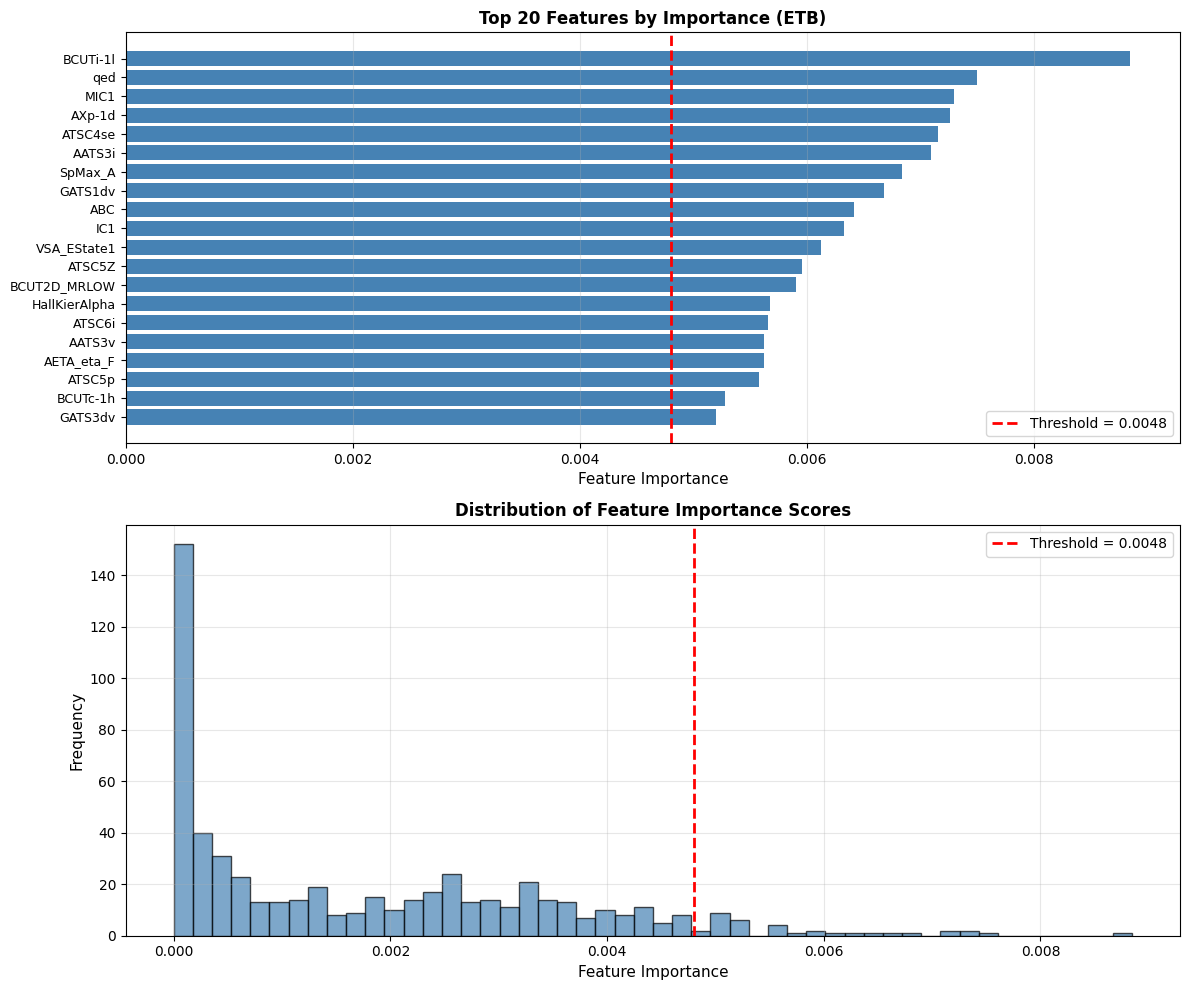

✓ ETB visualization saved to 'etb_feature_importance_visualization.png'

PREPARING ETB-SELECTED FEATURE DATA

Training set with ETB-selected features: (313, 35)
✓ ETB-selected training features saved to 'X_train_etb_selected.csv'

HYPERPARAMETER OPTIMIZATION ON ETB-SELECTED FEATURES

BUILDING OPTIMIZED MODEL WITH ETB-SELECTED FEATURES

Best hyperparameters for ETB-selected features:
  n_estimators: 116
  criterion: gini
  max_depth: 6
  max_features: 15

10-FOLD CROSS-VALIDATION EVALUATION (ETB-SELECTED FEATURES)

Performing 10-fold cross-validation...

10-Fold Cross-Validation Results (ETB-Selected Features):
AUC: 0.7652 ± 0.0946
ACC: 0.7318 ± 0.0607
SEN: 0.6891 ± 0.1076
SPE: 0.7728 ± 0.0795
MCC: 0.4638 ± 0.1282

✓ Cross-validation results saved to 'rf_etb_cv_results.csv'

TRAINING FINAL MODEL

Training Random Forest on full training set with ETB-selected features...
✓ Model training completed
✓ Model saved to 'rf_etb_optimized_model.pkl'
✓ Best parameters saved to 'rf_etb_best_parame

In [14]:
# ============================================================================
# Feature Selection using Embedded Tree-Based Method (ETB)
# ============================================================================
# This section implements feature selection using embedded tree-based approach
# ETB leverages the intrinsic feature importance computed by Random Forest
# through impurity-based splitting criteria
# Features with importance ≥ 0.0048 are retained based on empirical testing
# ============================================================================

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import matthews_corrcoef, make_scorer
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.early_stop import no_progress_loss
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("FEATURE SELECTION - EMBEDDED TREE-BASED (ETB)")
print("=" * 80)

# ============================================================================
# Step 1: Load Preprocessed Data and Base Model
# ============================================================================

print("\nLoading preprocessed features and optimized model...")
Xtrain_processed = pd.read_csv("X_train_processed.csv")
Ytrain = pd.read_csv("Y_train.csv").values.ravel()
rf_base = joblib.load('rf_optimized_model.pkl')

print(f"Training set: {Xtrain_processed.shape}")
print(f"Training labels distribution: {np.bincount(Ytrain)}")

# Set random seed
RANDOM_SEED = 1
np.random.seed(RANDOM_SEED)

# ============================================================================
# Step 2: Extract Feature Importance from Base Model
# ============================================================================

print("\n" + "=" * 80)
print("FEATURE IMPORTANCE EXTRACTION")
print("=" * 80)

print("\nExtracting feature importance from optimized Random Forest model...")

# Get feature importances
feature_importances = rf_base.feature_importances_
feature_names = rf_base.feature_names_in_

# Create feature importance series
importance_series = pd.Series(
    feature_importances, 
    index=feature_names
).sort_values(ascending=False)

print(f"\nFeature importance statistics:")
print(f"  Max importance: {feature_importances.max():.6f}")
print(f"  Min importance: {feature_importances.min():.6f}")
print(f"  Mean importance: {feature_importances.mean():.6f}")
print(f"  Median importance: {np.median(feature_importances):.6f}")

print("\nTop 10 features by importance:")
print("=" * 60)
for i, (feature, importance) in enumerate(importance_series.head(10).items(), 1):
    print(f"{i:2d}. {feature}: {importance:.6f}")
print("=" * 60)

# Save feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)
importance_df.to_csv('etb_feature_importance.csv', index=False)
print("\n✓ Feature importance saved to 'etb_feature_importance.csv'")

# ============================================================================
# Step 3: Feature Selection Based on Importance Threshold
# ============================================================================

print("\n" + "=" * 80)
print("ETB FEATURE SELECTION")
print("=" * 80)

# Define importance threshold
IMPORTANCE_THRESHOLD = 0.0048

print(f"\nImportance threshold: {IMPORTANCE_THRESHOLD}")

# Create mask for features above threshold
feature_mask = feature_importances >= IMPORTANCE_THRESHOLD
n_features_selected = feature_mask.sum()
n_features_removed = len(feature_importances) - n_features_selected

print(f"\nFeature selection results:")
print(f"  Features with importance ≥ {IMPORTANCE_THRESHOLD}: {n_features_selected}")
print(f"  Features removed: {n_features_removed}")
print(f"  Total features: {len(feature_importances)}")
print(f"  Retention rate: {(n_features_selected/len(feature_importances)*100):.2f}%")

# Get selected feature names
selected_features_etb = feature_names[feature_mask].tolist()

# Save selected features
pd.DataFrame({'Selected_Features': selected_features_etb}).to_csv(
    'etb_selected_features.csv', index=False
)
print("\n✓ Selected features saved to 'etb_selected_features.csv'")

# ============================================================================
# Step 4: Visualize Feature Importance Distribution
# ============================================================================

print("\n" + "=" * 80)
print("FEATURE IMPORTANCE VISUALIZATION")
print("=" * 80)

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Top 20 features by importance
top_n = min(20, n_features_selected)
top_features = importance_series.head(top_n)
axes[0].barh(range(top_n), top_features.values[::-1], color='steelblue')
axes[0].set_yticks(range(top_n))
axes[0].set_yticklabels(top_features.index[::-1], fontsize=9)
axes[0].set_xlabel('Feature Importance', fontsize=11)
axes[0].set_title(f'Top {top_n} Features by Importance (ETB)', fontsize=12, fontweight='bold')
axes[0].axvline(x=IMPORTANCE_THRESHOLD, color='r', linestyle='--', linewidth=2, 
                label=f'Threshold = {IMPORTANCE_THRESHOLD}')
axes[0].legend(fontsize=10)
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Distribution of feature importance
axes[1].hist(feature_importances, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[1].axvline(x=IMPORTANCE_THRESHOLD, color='r', linestyle='--', linewidth=2,
               label=f'Threshold = {IMPORTANCE_THRESHOLD}')
axes[1].set_xlabel('Feature Importance', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Distribution of Feature Importance Scores', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('etb_feature_importance_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ ETB visualization saved to 'etb_feature_importance_visualization.png'")

# ============================================================================
# Step 5: Create Training Data with ETB-Selected Features
# ============================================================================

print("\n" + "=" * 80)
print("PREPARING ETB-SELECTED FEATURE DATA")
print("=" * 80)

# Filter training data with selected features
X_train_etb = Xtrain_processed[selected_features_etb]

print(f"\nTraining set with ETB-selected features: {X_train_etb.shape}")

# Save ETB-selected training data
X_train_etb.to_csv('X_train_etb_selected.csv', index=False)
print("✓ ETB-selected training features saved to 'X_train_etb_selected.csv'")

# ============================================================================
# Step 6: Hyperparameter Optimization on ETB-Selected Features
# ============================================================================

print("\n" + "=" * 80)
print("HYPERPARAMETER OPTIMIZATION ON ETB-SELECTED FEATURES")
print("=" * 80)

# Define objective function
def hyperopt_objective_etb(params):
    """
    Objective function for hyperparameter optimization on ETB-selected features
    Returns negative MCC from 10-fold cross-validation
    """
    rf_model = RandomForestClassifier(
        n_estimators=int(params["n_estimators"]),
        criterion=params["criterion"],
        max_depth=int(params["max_depth"]),
        max_features=params["max_features"],
        random_state=RANDOM_SEED,
        n_jobs=-1
    )
    
    cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
    cv_results = cross_validate(
        rf_model,
        X_train_etb,
        Ytrain,
        cv=cv,
        scoring="matthews_corrcoef",
        n_jobs=-1,
        error_score="raise"
    )
    
    return -np.mean(cv_results["test_score"])

# Define hyperparameter search space
param_space_etb = {
    'n_estimators': hp.quniform("n_estimators", 40, 250, 1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    'max_depth': hp.quniform("max_depth", 5, 20, 1),
    "max_features": hp.choice("max_features", ["sqrt", "log2"] + list(range(10, 60)))
}

# Define optimization process
def optimize_hyperparameters_etb(max_evals=250):
    """
    Perform hyperparameter optimization on ETB-selected features
    
    Args:
        max_evals: Maximum number of evaluations
        
    Returns:
        best_params: Best hyperparameters found
        trials: Optimization trials history
    """
    trials = Trials()
    early_stop_fn = no_progress_loss(400)
    
    print(f"\nStarting hyperparameter optimization on ETB-selected features...")
    print(f"Maximum evaluations: {max_evals}")
    print(f"Optimization metric: Matthews Correlation Coefficient (MCC)")
    print(f"Cross-validation: 10-fold")
    
    best_params = fmin(
        fn=hyperopt_objective_etb,
        space=param_space_etb,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=trials,
        early_stop_fn=early_stop_fn,
        verbose=True
    )
    
    print("\n" + "=" * 80)
    print("OPTIMIZATION COMPLETED")
    print("=" * 80)
    print(f"\nBest parameters found: {best_params}")
    
    return best_params, trials

# Uncomment to run hyperparameter optimization
# print("\nNote: Hyperparameter optimization may take considerable time...")
# params_best_etb, trials_etb = optimize_hyperparameters_etb(max_evals=250)

# ============================================================================
# Step 7: Build Model with Best Parameters on ETB-Selected Features
# ============================================================================

print("\n" + "=" * 80)
print("BUILDING OPTIMIZED MODEL WITH ETB-SELECTED FEATURES")
print("=" * 80)

# Best parameters from optimization on ETB-selected features
best_params_etb = {
    'n_estimators': 116,
    'criterion': 'gini',
    'max_depth': 6,
    'max_features': 15
}

print("\nBest hyperparameters for ETB-selected features:")
for param, value in best_params_etb.items():
    print(f"  {param}: {value}")

# Initialize Random Forest with best parameters
rf_etb_best = RandomForestClassifier(
    n_estimators=best_params_etb['n_estimators'],
    criterion=best_params_etb['criterion'],
    max_depth=best_params_etb['max_depth'],
    max_features=best_params_etb['max_features'],
    random_state=RANDOM_SEED,
    n_jobs=-1
)

# ============================================================================
# Step 8: 10-Fold Cross-Validation Evaluation
# ============================================================================

print("\n" + "=" * 80)
print("10-FOLD CROSS-VALIDATION EVALUATION (ETB-SELECTED FEATURES)")
print("=" * 80)

# Define custom scoring functions
def sensitivity_score(y_true, y_pred):
    from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

def specificity_score(y_true, y_pred):
    from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Define scoring metrics
scoring = {
    'AUC': 'roc_auc',
    'ACC': 'accuracy',
    'SEN': make_scorer(sensitivity_score),
    'SPE': make_scorer(specificity_score),
    'MCC': make_scorer(matthews_corrcoef)
}

# Perform 10-fold cross-validation
print("\nPerforming 10-fold cross-validation...")
cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
cv_results_etb = cross_validate(
    rf_etb_best,
    X_train_etb,
    Ytrain,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

# Calculate mean and std for each metric
cv_summary_etb = pd.DataFrame({
    'Metric': ['AUC', 'ACC', 'SEN', 'SPE', 'MCC'],
    'Mean': [
        cv_results_etb['test_AUC'].mean(),
        cv_results_etb['test_ACC'].mean(),
        cv_results_etb['test_SEN'].mean(),
        cv_results_etb['test_SPE'].mean(),
        cv_results_etb['test_MCC'].mean()
    ],
    'Std': [
        cv_results_etb['test_AUC'].std(),
        cv_results_etb['test_ACC'].std(),
        cv_results_etb['test_SEN'].std(),
        cv_results_etb['test_SPE'].std(),
        cv_results_etb['test_MCC'].std()
    ]
})

print("\n10-Fold Cross-Validation Results (ETB-Selected Features):")
print("=" * 60)
for idx, row in cv_summary_etb.iterrows():
    print(f"{row['Metric']}: {row['Mean']:.4f} ± {row['Std']:.4f}")
print("=" * 60)

# Save CV results
cv_summary_etb.to_csv('rf_etb_cv_results.csv', index=False)
print("\n✓ Cross-validation results saved to 'rf_etb_cv_results.csv'")

# ============================================================================
# Step 9: Train Final Model and Save
# ============================================================================

print("\n" + "=" * 80)
print("TRAINING FINAL MODEL")
print("=" * 80)

print("\nTraining Random Forest on full training set with ETB-selected features...")
rf_etb_best.fit(X_train_etb, Ytrain)
print("✓ Model training completed")

# Save the trained model
joblib.dump(rf_etb_best, 'rf_etb_optimized_model.pkl')
print("✓ Model saved to 'rf_etb_optimized_model.pkl'")

# Save best parameters
params_etb_df = pd.DataFrame([best_params_etb])
params_etb_df.to_csv('rf_etb_best_parameters.csv', index=False)
print("✓ Best parameters saved to 'rf_etb_best_parameters.csv'")

print("\n" + "=" * 80)
print("EMBEDDED TREE-BASED FEATURE SELECTION COMPLETED")
print("=" * 80)
print("\nThe ETB-optimized model is ready for further evaluation.")


TEST SET EVALUATION - RANDOM FOREST WITH ETB-SELECTED FEATURES

Loading test data and trained Random Forest model...

Test set dimensions: (79, 572)
Test labels distribution: [48 31]
Number of ETB-selected features: 35
Test set with ETB-selected features: (79, 35)

GENERATING PREDICTIONS

Making predictions on test set...
✓ Predictions completed

PERFORMANCE METRICS ON TEST SET

Random Forest Test Set Performance:
AUC:         0.7702
Accuracy:    0.7342
Sensitivity: 0.7097
Specificity: 0.7500
MCC:         0.4533

Confusion Matrix:
True Positives (TP):  22
False Negatives (FN): 9
False Positives (FP): 12
True Negatives (TN):  36

✓ Test metrics saved to 'rf_test_performance_metrics.csv'
✓ Confusion matrix saved to 'rf_test_confusion_matrix.csv'

CONFUSION MATRIX VISUALIZATION


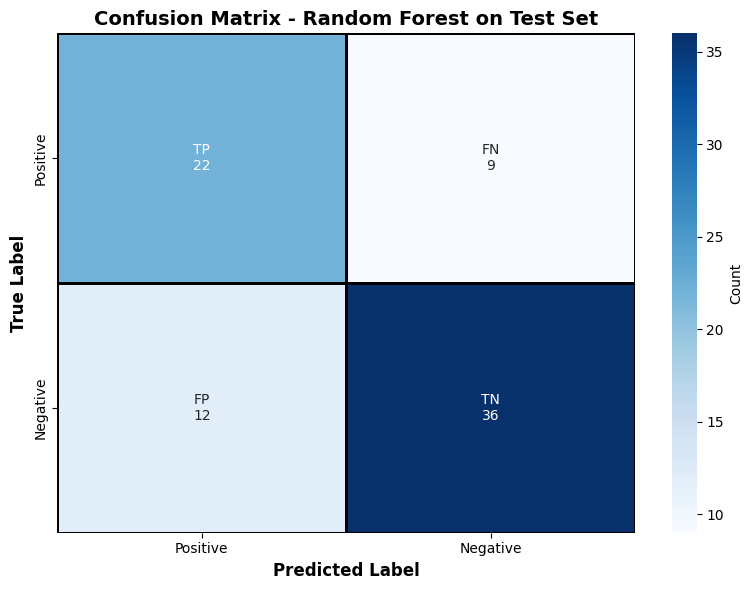

✓ Confusion matrix heatmap saved to 'rf_test_confusion_matrix_heatmap.png'

ROC CURVE VISUALIZATION


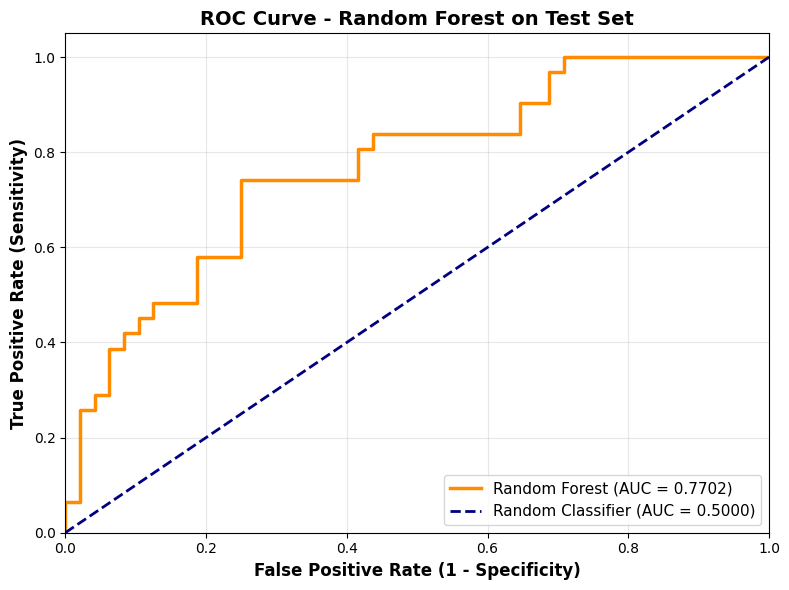

✓ ROC curve saved to 'rf_test_roc_curve.png'
✓ ROC curve data saved to 'rf_test_roc_data.csv'

DETAILED CLASSIFICATION REPORT

               precision    recall  f1-score   support

 Low Risk (0)     0.8000    0.7500    0.7742        48
High Risk (1)     0.6471    0.7097    0.6769        31

     accuracy                         0.7342        79
    macro avg     0.7235    0.7298    0.7256        79
 weighted avg     0.7400    0.7342    0.7360        79

✓ Classification report saved to 'rf_test_classification_report.csv'

SAVING PREDICTIONS
✓ Predictions saved to 'rf_test_predictions.csv'

PREDICTION SUMMARY

True Label Distribution:
  Low Risk (0):  48 samples
  High Risk (1): 31 samples

Predicted Label Distribution:
  Low Risk (0):  45 samples
  High Risk (1): 34 samples

Prediction Accuracy:
  Correct predictions:   58 (73.42%)
  Incorrect predictions: 21 (26.58%)

RANDOM FOREST TEST SET EVALUATION COMPLETED

All results have been saved successfully.
The Random Forest model evalu

In [16]:
# ============================================================================
# Model Evaluation on Test Set with ETB-Selected Features
# ============================================================================
# This section evaluates the optimized Random Forest model on the test set
# using ETB-selected features
# Comprehensive performance metrics and visualizations are generated
# ============================================================================

import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, roc_auc_score, accuracy_score,
    matthews_corrcoef, roc_curve, auc, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("TEST SET EVALUATION - RANDOM FOREST WITH ETB-SELECTED FEATURES")
print("=" * 80)

# ============================================================================
# Step 1: Load Test Data and Trained Model
# ============================================================================

print("\nLoading test data and trained Random Forest model...")

# Load preprocessed test data
Xtest_processed = pd.read_csv("X_test_processed.csv")
Ytest = pd.read_csv("Y_test.csv").values.ravel()

# Load ETB-selected features
etb_selected_features = pd.read_csv('etb_selected_features.csv')['Selected_Features'].tolist()

# Load trained Random Forest model
rf_etb_best = joblib.load('rf_etb_optimized_model.pkl')

print(f"\nTest set dimensions: {Xtest_processed.shape}")
print(f"Test labels distribution: {np.bincount(Ytest)}")
print(f"Number of ETB-selected features: {len(etb_selected_features)}")

# Filter test data with ETB-selected features
X_test_etb = Xtest_processed[etb_selected_features]
print(f"Test set with ETB-selected features: {X_test_etb.shape}")

# ============================================================================
# Step 2: Make Predictions on Test Set
# ============================================================================

print("\n" + "=" * 80)
print("GENERATING PREDICTIONS")
print("=" * 80)

print("\nMaking predictions on test set...")

# Get predictions and prediction probabilities
y_test_pred = rf_etb_best.predict(X_test_etb)
y_test_proba = rf_etb_best.predict_proba(X_test_etb)[:, 1]

print("✓ Predictions completed")

# ============================================================================
# Step 3: Calculate Performance Metrics
# ============================================================================

print("\n" + "=" * 80)
print("PERFORMANCE METRICS ON TEST SET")
print("=" * 80)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(Ytest, y_test_pred).ravel()

# Calculate all metrics
test_auc = roc_auc_score(Ytest, y_test_proba)
test_acc = accuracy_score(Ytest, y_test_pred)
test_sen = tp / (tp + fn)  # Sensitivity (Recall)
test_spe = tn / (tn + fp)  # Specificity
test_mcc = matthews_corrcoef(Ytest, y_test_pred)

# Create performance summary
print("\nRandom Forest Test Set Performance:")
print("=" * 60)
print(f"AUC:         {test_auc:.4f}")
print(f"Accuracy:    {test_acc:.4f}")
print(f"Sensitivity: {test_sen:.4f}")
print(f"Specificity: {test_spe:.4f}")
print(f"MCC:         {test_mcc:.4f}")
print("=" * 60)

# Confusion matrix details
print("\nConfusion Matrix:")
print("=" * 60)
print(f"True Positives (TP):  {tp}")
print(f"False Negatives (FN): {fn}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN):  {tn}")
print("=" * 60)

# Save performance metrics
test_metrics_df = pd.DataFrame({
    'Metric': ['AUC', 'ACC', 'SEN', 'SPE', 'MCC'],
    'Value': [test_auc, test_acc, test_sen, test_spe, test_mcc]
})
test_metrics_df.to_csv('rf_test_performance_metrics.csv', index=False)
print("\n✓ Test metrics saved to 'rf_test_performance_metrics.csv'")

# Save confusion matrix
confusion_df = pd.DataFrame({
    'TP': [tp],
    'FN': [fn],
    'FP': [fp],
    'TN': [tn]
})
confusion_df.to_csv('rf_test_confusion_matrix.csv', index=False)
print("✓ Confusion matrix saved to 'rf_test_confusion_matrix.csv'")

# ============================================================================
# Step 4: Visualize Confusion Matrix
# ============================================================================

print("\n" + "=" * 80)
print("CONFUSION MATRIX VISUALIZATION")
print("=" * 80)

# Create confusion matrix heatmap
fig, ax = plt.subplots(figsize=(8, 6))

# Prepare confusion matrix for visualization
cm = np.array([[tp, fn], [fp, tn]])
cm_display = np.array([['TP', 'FN'], ['FP', 'TN']])

# Create annotations with counts and labels
annotations = np.empty_like(cm_display, dtype=object)
for i in range(2):
    for j in range(2):
        annotations[i, j] = f'{cm_display[i, j]}\n{cm[i, j]}'

sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues', 
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'],
            cbar_kws={'label': 'Count'},
            linewidths=2, linecolor='black',
            ax=ax)

ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title('Confusion Matrix - Random Forest on Test Set', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('rf_test_confusion_matrix_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrix heatmap saved to 'rf_test_confusion_matrix_heatmap.png'")

# ============================================================================
# Step 5: ROC Curve Visualization
# ============================================================================

print("\n" + "=" * 80)
print("ROC CURVE VISUALIZATION")
print("=" * 80)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Ytest, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, color='darkorange', lw=2.5, 
        label=f'Random Forest (AUC = {roc_auc:.4f})')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
        label='Random Classifier (AUC = 0.5000)')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
ax.set_ylabel('True Positive Rate (Sensitivity)', fontsize=12, fontweight='bold')
ax.set_title('ROC Curve - Random Forest on Test Set', fontsize=14, fontweight='bold')
ax.legend(loc="lower right", fontsize=11)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('rf_test_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ ROC curve saved to 'rf_test_roc_curve.png'")

# Save ROC curve data
roc_data = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr,
    'Threshold': thresholds
})
roc_data.to_csv('rf_test_roc_data.csv', index=False)
print("✓ ROC curve data saved to 'rf_test_roc_data.csv'")

# ============================================================================
# Step 6: Classification Report
# ============================================================================

print("\n" + "=" * 80)
print("DETAILED CLASSIFICATION REPORT")
print("=" * 80)

# Generate classification report
print("\n" + classification_report(Ytest, y_test_pred, 
                                   target_names=['Low Risk (0)', 'High Risk (1)'],
                                   digits=4))

# Save classification report
report_dict = classification_report(Ytest, y_test_pred,
                                   target_names=['Low Risk (0)', 'High Risk (1)'],
                                   output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv('rf_test_classification_report.csv')
print("✓ Classification report saved to 'rf_test_classification_report.csv'")

# ============================================================================
# Step 7: Save Predictions
# ============================================================================

print("\n" + "=" * 80)
print("SAVING PREDICTIONS")
print("=" * 80)

# Create predictions DataFrame
predictions_df = pd.DataFrame({
    'True_Label': Ytest,
    'Predicted_Label': y_test_pred,
    'Prediction_Probability': y_test_proba
})

predictions_df.to_csv('rf_test_predictions.csv', index=False)
print("✓ Predictions saved to 'rf_test_predictions.csv'")

# ============================================================================
# Step 8: Summary Statistics
# ============================================================================

print("\n" + "=" * 80)
print("PREDICTION SUMMARY")
print("=" * 80)

# Calculate prediction distribution
pred_distribution = pd.Series(y_test_pred).value_counts().sort_index()
true_distribution = pd.Series(Ytest).value_counts().sort_index()

print("\nTrue Label Distribution:")
print(f"  Low Risk (0):  {true_distribution.get(0, 0)} samples")
print(f"  High Risk (1): {true_distribution.get(1, 0)} samples")

print("\nPredicted Label Distribution:")
print(f"  Low Risk (0):  {pred_distribution.get(0, 0)} samples")
print(f"  High Risk (1): {pred_distribution.get(1, 0)} samples")

# Calculate error analysis
correct_predictions = (Ytest == y_test_pred).sum()
incorrect_predictions = (Ytest != y_test_pred).sum()

print(f"\nPrediction Accuracy:")
print(f"  Correct predictions:   {correct_predictions} ({correct_predictions/len(Ytest)*100:.2f}%)")
print(f"  Incorrect predictions: {incorrect_predictions} ({incorrect_predictions/len(Ytest)*100:.2f}%)")

print("\n" + "=" * 80)
print("RANDOM FOREST TEST SET EVALUATION COMPLETED")
print("=" * 80)
print("\nAll results have been saved successfully.")
print("The Random Forest model evaluation is complete.")

LIGHTGBM MODEL DEVELOPMENT AND EVALUATION

Loading data with ETB-selected features...
Training set: (313, 35)
Test set: (79, 35)
Training labels distribution: [163 150]
Test labels distribution: [48 31]

HYPERPARAMETER OPTIMIZATION SETUP

BUILDING OPTIMIZED LIGHTGBM MODEL

Best hyperparameters for LightGBM:
  boosting_type: gbdt
  n_estimators: 291
  learning_rate: 0.66
  max_depth: 1
  num_leaves: 14
  colsample_bytree: 0.53
  subsample: 0.54
  min_child_samples: 6
  reg_alpha: 0.014763456017094792
  reg_lambda: 0.054855294395690556

10-FOLD CROSS-VALIDATION EVALUATION (TRAINING SET)

Performing 10-fold cross-validation on training set...

10-Fold Cross-Validation Results (Training Set):
AUC: 0.7828 ± 0.0821
ACC: 0.7321 ± 0.1124
SEN: 0.7156 ± 0.1313
SPE: 0.7587 ± 0.1351
MCC: 0.4742 ± 0.2214

✓ Cross-validation results saved to 'lgbm_cv_results.csv'

TRAINING LIGHTGBM MODEL

Training LightGBM on full training set...
✓ Model training completed
✓ Model saved to 'lgbm_optimized_model.pkl'

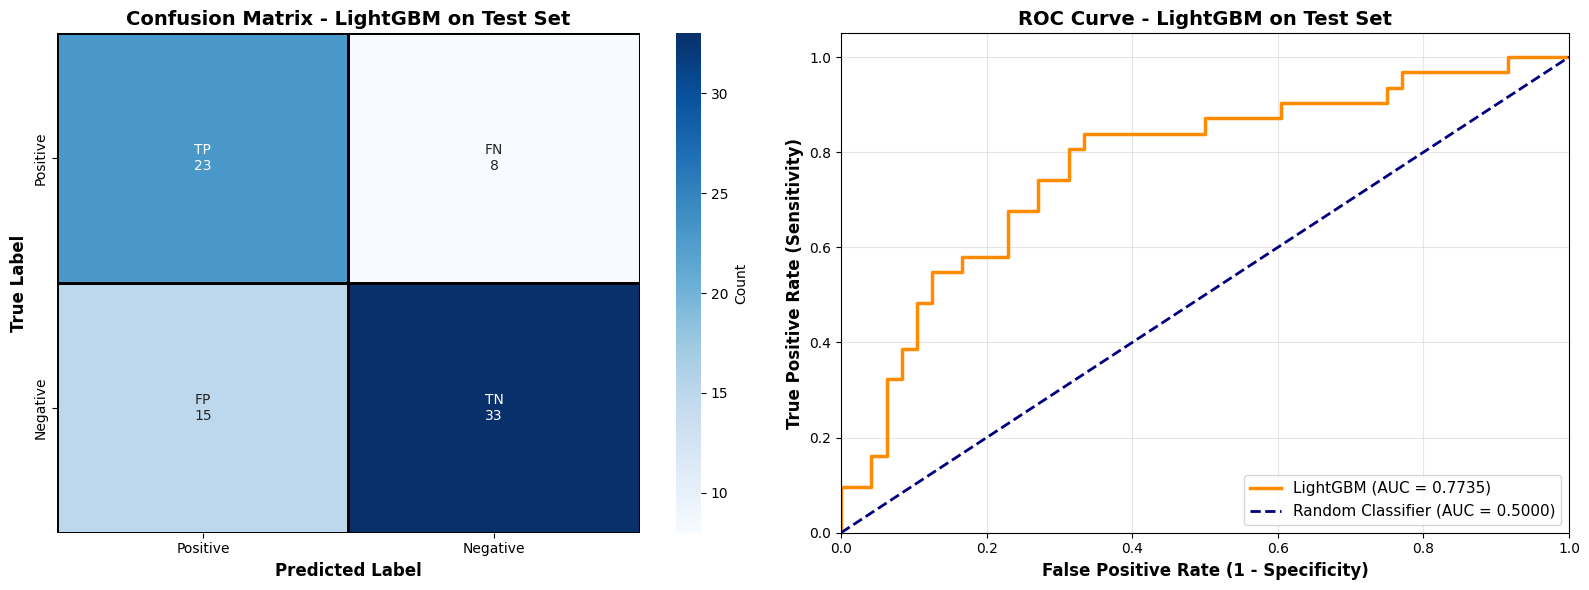

✓ Visualizations saved to 'lgbm_test_evaluation.png'
✓ ROC curve data saved to 'lgbm_test_roc_data.csv'

SAVING PREDICTIONS
✓ Predictions saved to 'lgbm_test_predictions.csv'

LIGHTGBM MODEL EVALUATION COMPLETED

All results have been saved successfully.


In [17]:
# ============================================================================
# LightGBM Model Development and Evaluation
# ============================================================================
# This section implements LightGBM classifier with hyperparameter optimization
# Model is trained on ETB-selected features
# Evaluation includes 10-fold cross-validation on training set and test set performance
# ============================================================================

import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import (
    confusion_matrix, roc_auc_score, accuracy_score,
    matthews_corrcoef, roc_curve, auc, classification_report, make_scorer
)
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.early_stop import no_progress_loss
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("LIGHTGBM MODEL DEVELOPMENT AND EVALUATION")
print("=" * 80)

# ============================================================================
# Step 1: Load Data with ETB-Selected Features
# ============================================================================

print("\nLoading data with ETB-selected features...")

# Load training and test data
X_train_etb = pd.read_csv("X_train_etb_selected.csv")
Ytrain = pd.read_csv("Y_train.csv").values.ravel()
Xtest_processed = pd.read_csv("X_test_processed.csv")
Ytest = pd.read_csv("Y_test.csv").values.ravel()

# Load ETB-selected features
etb_selected_features = pd.read_csv('etb_selected_features.csv')['Selected_Features'].tolist()
X_test_etb = Xtest_processed[etb_selected_features]

print(f"Training set: {X_train_etb.shape}")
print(f"Test set: {X_test_etb.shape}")
print(f"Training labels distribution: {np.bincount(Ytrain)}")
print(f"Test labels distribution: {np.bincount(Ytest)}")

# Set random seed
RANDOM_SEED = 1
np.random.seed(RANDOM_SEED)

# ============================================================================
# Step 2: Hyperparameter Optimization Setup
# ============================================================================

print("\n" + "=" * 80)
print("HYPERPARAMETER OPTIMIZATION SETUP")
print("=" * 80)

# Define objective function for hyperparameter optimization
def hyperopt_objective(params):
    """
    Objective function for LightGBM hyperparameter optimization
    Returns negative MCC from 10-fold cross-validation
    """
    lgbm_model = LGBMClassifier(
        boosting_type=params['boosting_type'],
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        num_leaves=int(params['num_leaves']),
        colsample_bytree=params['colsample_bytree'],
        subsample=params['subsample'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda'],
        min_child_samples=int(params["min_child_samples"]),
        random_state=RANDOM_SEED,
        n_jobs=-1,
        verbose=-1
    )
    
    cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
    cv_results = cross_validate(
        lgbm_model,
        X_train_etb,
        Ytrain,
        cv=cv,
        scoring="matthews_corrcoef",
        n_jobs=-1,
        error_score="raise"
    )
    
    return -np.mean(cv_results["test_score"])

# Define hyperparameter search space
param_space_lgbm = {
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    "n_estimators": hp.quniform('n_estimators', 40, 300, 1),
    'learning_rate': hp.quniform("learning_rate", 0.01, 1.0, 0.01),
    "max_depth": hp.quniform('max_depth', 1, 6, 1),
    'num_leaves': hp.quniform('num_leaves', 10, 100, 1),
    "colsample_bytree": hp.quniform('colsample_bytree', 0.3, 1.0, 0.01),
    "subsample": hp.quniform('subsample', 0.5, 1.0, 0.01),
    "reg_alpha": hp.loguniform('reg_alpha', -5, 0),
    "reg_lambda": hp.loguniform('reg_lambda', -5, 0),
    'min_child_samples': hp.quniform('min_child_samples', 1, 20, 1)
}

# Define optimization process
def optimize_hyperparameters_lgbm(max_evals=250):
    """
    Perform hyperparameter optimization for LightGBM
    
    Args:
        max_evals: Maximum number of evaluations
        
    Returns:
        best_params: Best hyperparameters found
        trials: Optimization trials history
    """
    trials = Trials()
    early_stop_fn = no_progress_loss(400)
    
    print(f"\nStarting LightGBM hyperparameter optimization...")
    print(f"Maximum evaluations: {max_evals}")
    print(f"Optimization metric: Matthews Correlation Coefficient (MCC)")
    print(f"Cross-validation: 10-fold")
    
    params_best = fmin(
        fn=hyperopt_objective,
        space=param_space_lgbm,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=trials,
        early_stop_fn=early_stop_fn,
        verbose=True
    )
    
    print("\n" + "=" * 80)
    print("OPTIMIZATION COMPLETED")
    print("=" * 80)
    print(f"\nBest params: {params_best}")
    
    return params_best, trials

# ============================================================================
# Step 3: Hyperparameter Optimization (Optional)
# ============================================================================
# Uncomment to run hyperparameter optimization

# print("\nNote: Hyperparameter optimization may take considerable time...")
# params_best, trials = optimize_hyperparameters_lgbm(max_evals=250)

# ============================================================================
# Step 4: Build Model with Best Parameters
# ============================================================================

print("\n" + "=" * 80)
print("BUILDING OPTIMIZED LIGHTGBM MODEL")
print("=" * 80)

# Best parameters from optimization
# Raw parameters from Hyperopt
params_best_raw = {
    'boosting_type': 0,
    'colsample_bytree': 0.53,
    'learning_rate': 0.66,
    'max_depth': 1.0,
    'min_child_samples': 6.0,
    'n_estimators': 291.0,
    'num_leaves': 14.0,
    'reg_alpha': 0.014763456017094792,
    'reg_lambda': 0.054855294395690556,
    'subsample': 0.54
}

# Convert to actual parameter values
best_params_lgbm = {
    'boosting_type': ['gbdt', 'dart'][params_best_raw['boosting_type']],
    'n_estimators': int(params_best_raw['n_estimators']),
    'learning_rate': params_best_raw['learning_rate'],
    'max_depth': int(params_best_raw['max_depth']),
    'num_leaves': int(params_best_raw['num_leaves']),
    'colsample_bytree': params_best_raw['colsample_bytree'],
    'subsample': params_best_raw['subsample'],
    'min_child_samples': int(params_best_raw['min_child_samples']),
    'reg_alpha': params_best_raw['reg_alpha'],
    'reg_lambda': params_best_raw['reg_lambda']
}

print("\nBest hyperparameters for LightGBM:")
for param, value in best_params_lgbm.items():
    print(f"  {param}: {value}")

# Initialize LightGBM with best parameters
lgbm_best = LGBMClassifier(
    boosting_type=best_params_lgbm['boosting_type'],
    n_estimators=best_params_lgbm['n_estimators'],
    learning_rate=best_params_lgbm['learning_rate'],
    max_depth=best_params_lgbm['max_depth'],
    num_leaves=best_params_lgbm['num_leaves'],
    colsample_bytree=best_params_lgbm['colsample_bytree'],
    subsample=best_params_lgbm['subsample'],
    min_child_samples=best_params_lgbm['min_child_samples'],
    reg_alpha=best_params_lgbm['reg_alpha'],
    reg_lambda=best_params_lgbm['reg_lambda'],
    random_state=RANDOM_SEED,
    n_jobs=-1,
    verbose=-1
)

# ============================================================================
# Step 5: 10-Fold Cross-Validation on Training Set
# ============================================================================

print("\n" + "=" * 80)
print("10-FOLD CROSS-VALIDATION EVALUATION (TRAINING SET)")
print("=" * 80)

# Define custom scoring functions
def sensitivity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Define scoring metrics
scoring = {
    'AUC': 'roc_auc',
    'ACC': 'accuracy',
    'SEN': make_scorer(sensitivity_score),
    'SPE': make_scorer(specificity_score),
    'MCC': make_scorer(matthews_corrcoef)
}

# Perform 10-fold cross-validation
print("\nPerforming 10-fold cross-validation on training set...")
cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
cv_results_lgbm = cross_validate(
    lgbm_best,
    X_train_etb,
    Ytrain,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

# Calculate mean and std for each metric
cv_summary_lgbm = pd.DataFrame({
    'Metric': ['AUC', 'ACC', 'SEN', 'SPE', 'MCC'],
    'Mean': [
        cv_results_lgbm['test_AUC'].mean(),
        cv_results_lgbm['test_ACC'].mean(),
        cv_results_lgbm['test_SEN'].mean(),
        cv_results_lgbm['test_SPE'].mean(),
        cv_results_lgbm['test_MCC'].mean()
    ],
    'Std': [
        cv_results_lgbm['test_AUC'].std(),
        cv_results_lgbm['test_ACC'].std(),
        cv_results_lgbm['test_SEN'].std(),
        cv_results_lgbm['test_SPE'].std(),
        cv_results_lgbm['test_MCC'].std()
    ]
})

print("\n10-Fold Cross-Validation Results (Training Set):")
print("=" * 60)
for idx, row in cv_summary_lgbm.iterrows():
    print(f"{row['Metric']}: {row['Mean']:.4f} ± {row['Std']:.4f}")
print("=" * 60)

# Save CV results
cv_summary_lgbm.to_csv('lgbm_cv_results.csv', index=False)
print("\n✓ Cross-validation results saved to 'lgbm_cv_results.csv'")

# ============================================================================
# Step 6: Train Model on Full Training Set
# ============================================================================

print("\n" + "=" * 80)
print("TRAINING LIGHTGBM MODEL")
print("=" * 80)

print("\nTraining LightGBM on full training set...")
lgbm_best.fit(X_train_etb, Ytrain)
print("✓ Model training completed")

# Save the trained model
joblib.dump(lgbm_best, 'lgbm_optimized_model.pkl')
print("✓ Model saved to 'lgbm_optimized_model.pkl'")

# Save best parameters
params_lgbm_df = pd.DataFrame([best_params_lgbm])
params_lgbm_df.to_csv('lgbm_best_parameters.csv', index=False)
print("✓ Best parameters saved to 'lgbm_best_parameters.csv'")

# ============================================================================
# Step 7: Test Set Evaluation
# ============================================================================

print("\n" + "=" * 80)
print("TEST SET EVALUATION")
print("=" * 80)

print("\nMaking predictions on test set...")

# Get predictions and prediction probabilities
y_test_pred = lgbm_best.predict(X_test_etb)
y_test_proba = lgbm_best.predict_proba(X_test_etb)[:, 1]

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(Ytest, y_test_pred).ravel()

# Calculate all metrics
test_auc = roc_auc_score(Ytest, y_test_proba)
test_acc = accuracy_score(Ytest, y_test_pred)
test_sen = tp / (tp + fn)
test_spe = tn / (tn + fp)
test_mcc = matthews_corrcoef(Ytest, y_test_pred)

# Create performance summary
print("\nLightGBM Test Set Performance:")
print("=" * 60)
print(f"AUC:         {test_auc:.4f}")
print(f"Accuracy:    {test_acc:.4f}")
print(f"Sensitivity: {test_sen:.4f}")
print(f"Specificity: {test_spe:.4f}")
print(f"MCC:         {test_mcc:.4f}")
print("=" * 60)

# Confusion matrix details
print("\nConfusion Matrix:")
print("=" * 60)
print(f"True Positives (TP):  {tp}")
print(f"False Negatives (FN): {fn}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN):  {tn}")
print("=" * 60)

# Save test performance metrics
test_metrics_df = pd.DataFrame({
    'Metric': ['AUC', 'ACC', 'SEN', 'SPE', 'MCC'],
    'Value': [test_auc, test_acc, test_sen, test_spe, test_mcc]
})
test_metrics_df.to_csv('lgbm_test_performance_metrics.csv', index=False)
print("\n✓ Test metrics saved to 'lgbm_test_performance_metrics.csv'")

# Save confusion matrix
confusion_df = pd.DataFrame({
    'TP': [tp],
    'FN': [fn],
    'FP': [fp],
    'TN': [tn]
})
confusion_df.to_csv('lgbm_test_confusion_matrix.csv', index=False)
print("✓ Confusion matrix saved to 'lgbm_test_confusion_matrix.csv'")

# ============================================================================
# Step 8: Visualizations
# ============================================================================

print("\n" + "=" * 80)
print("GENERATING VISUALIZATIONS")
print("=" * 80)

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Confusion Matrix Heatmap
cm = np.array([[tp, fn], [fp, tn]])
cm_display = np.array([['TP', 'FN'], ['FP', 'TN']])
annotations = np.empty_like(cm_display, dtype=object)
for i in range(2):
    for j in range(2):
        annotations[i, j] = f'{cm_display[i, j]}\n{cm[i, j]}'

sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'],
            cbar_kws={'label': 'Count'},
            linewidths=2, linecolor='black',
            ax=axes[0])
axes[0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[0].set_title('Confusion Matrix - LightGBM on Test Set', fontsize=14, fontweight='bold')

# Plot 2: ROC Curve
fpr, tpr, thresholds = roc_curve(Ytest, y_test_proba)
roc_auc = auc(fpr, tpr)

axes[1].plot(fpr, tpr, color='darkorange', lw=2.5,
            label=f'LightGBM (AUC = {roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
            label='Random Classifier (AUC = 0.5000)')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('True Positive Rate (Sensitivity)', fontsize=12, fontweight='bold')
axes[1].set_title('ROC Curve - LightGBM on Test Set', fontsize=14, fontweight='bold')
axes[1].legend(loc="lower right", fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('lgbm_test_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualizations saved to 'lgbm_test_evaluation.png'")

# Save ROC curve data
roc_data = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr,
    'Threshold': thresholds
})
roc_data.to_csv('lgbm_test_roc_data.csv', index=False)
print("✓ ROC curve data saved to 'lgbm_test_roc_data.csv'")

# ============================================================================
# Step 9: Save Predictions
# ============================================================================

print("\n" + "=" * 80)
print("SAVING PREDICTIONS")
print("=" * 80)

# Create predictions DataFrame
predictions_df = pd.DataFrame({
    'True_Label': Ytest,
    'Predicted_Label': y_test_pred,
    'Prediction_Probability': y_test_proba
})

predictions_df.to_csv('lgbm_test_predictions.csv', index=False)
print("✓ Predictions saved to 'lgbm_test_predictions.csv'")

print("\n" + "=" * 80)
print("LIGHTGBM MODEL EVALUATION COMPLETED")
print("=" * 80)
print("\nAll results have been saved successfully.")

XGBOOST MODEL DEVELOPMENT AND EVALUATION

Loading data with ETB-selected features...
Training set: (313, 35)
Test set: (79, 35)
Training labels distribution: [163 150]
Test labels distribution: [48 31]

HYPERPARAMETER OPTIMIZATION SETUP

BUILDING OPTIMIZED XGBOOST MODEL

Best hyperparameters for XGBoost:
  booster: dart
  n_estimators: 136
  learning_rate: 0.15
  max_depth: 2
  min_child_weight: 2
  gamma: 0.057843137509900465
  reg_lambda: 0.07383768244582013
  colsample_bytree: 1.0
  colsample_bynode: 0.7
  subsample: 0.8

10-FOLD CROSS-VALIDATION EVALUATION (TRAINING SET)

Performing 10-fold cross-validation on training set...

10-Fold Cross-Validation Results (Training Set):
AUC: 0.7793 ± 0.0907
ACC: 0.7511 ± 0.0839
SEN: 0.6961 ± 0.1181
SPE: 0.8001 ± 0.0795
MCC: 0.4968 ± 0.1764

✓ Cross-validation results saved to 'xgb_cv_results.csv'

TRAINING XGBOOST MODEL

Training XGBoost on full training set...
✓ Model training completed
✓ Model saved to 'xgb_optimized_model.pkl'
✓ Best parame

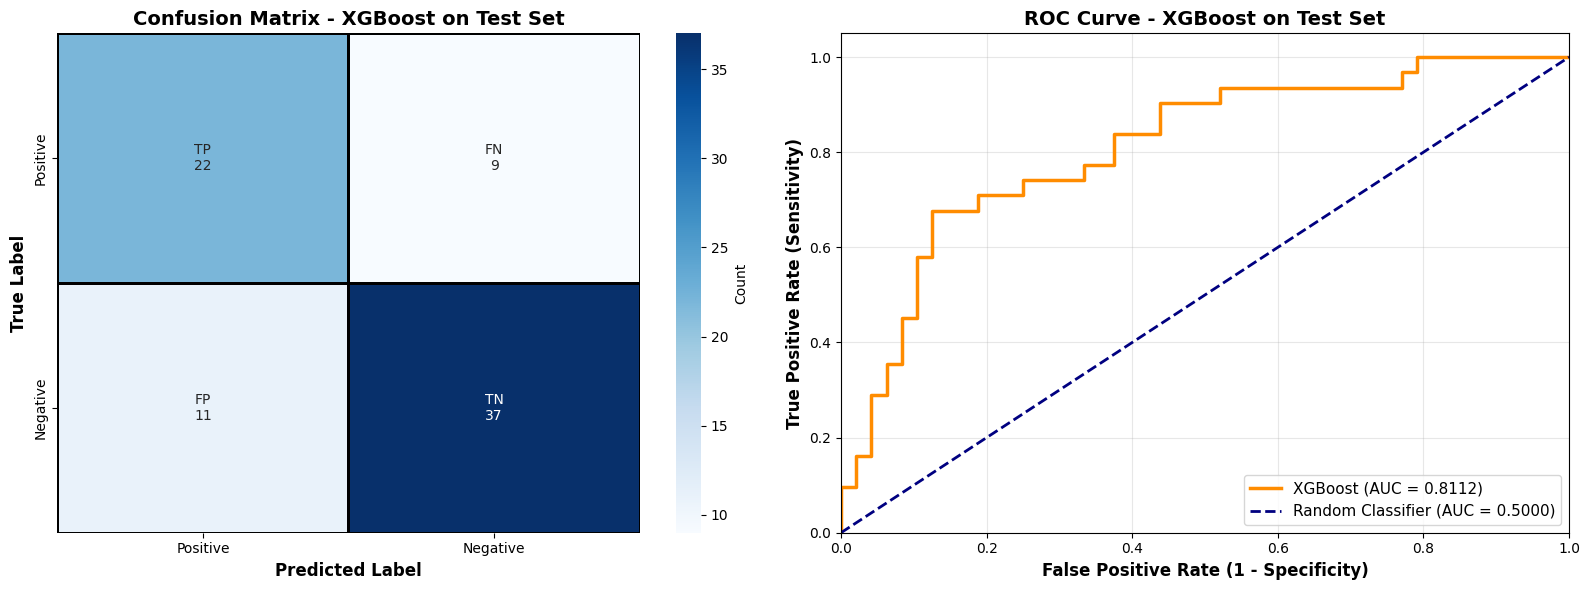

✓ Visualizations saved to 'xgb_test_evaluation.png'
✓ ROC curve data saved to 'xgb_test_roc_data.csv'

SAVING PREDICTIONS
✓ Predictions saved to 'xgb_test_predictions.csv'

XGBOOST MODEL EVALUATION COMPLETED

All results have been saved successfully.


In [18]:
# ============================================================================
# XGBoost Model Development and Evaluation
# ============================================================================
# This section implements XGBoost classifier with hyperparameter optimization
# Model is trained on ETB-selected features
# Evaluation includes 10-fold cross-validation on training set and test set performance
# ============================================================================

import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import (
    confusion_matrix, roc_auc_score, accuracy_score,
    matthews_corrcoef, roc_curve, auc, classification_report, make_scorer
)
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.early_stop import no_progress_loss
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("XGBOOST MODEL DEVELOPMENT AND EVALUATION")
print("=" * 80)

# ============================================================================
# Step 1: Load Data with ETB-Selected Features
# ============================================================================

print("\nLoading data with ETB-selected features...")

# Load training and test data
X_train_etb = pd.read_csv("X_train_etb_selected.csv")
Ytrain = pd.read_csv("Y_train.csv").values.ravel()
Xtest_processed = pd.read_csv("X_test_processed.csv")
Ytest = pd.read_csv("Y_test.csv").values.ravel()

# Load ETB-selected features
etb_selected_features = pd.read_csv('etb_selected_features.csv')['Selected_Features'].tolist()
X_test_etb = Xtest_processed[etb_selected_features]

print(f"Training set: {X_train_etb.shape}")
print(f"Test set: {X_test_etb.shape}")
print(f"Training labels distribution: {np.bincount(Ytrain)}")
print(f"Test labels distribution: {np.bincount(Ytest)}")

# Set random seed
RANDOM_SEED = 1
np.random.seed(RANDOM_SEED)

# ============================================================================
# Step 2: Hyperparameter Optimization Setup
# ============================================================================

print("\n" + "=" * 80)
print("HYPERPARAMETER OPTIMIZATION SETUP")
print("=" * 80)

# Define objective function for hyperparameter optimization
def hyperopt_objective(params):
    """
    Objective function for XGBoost hyperparameter optimization
    Returns negative MCC from 10-fold cross-validation
    """
    booster_options = ["gbtree", "gblinear", "dart"]
    booster = booster_options[params["booster"]]
    
    xgb_model = XGBClassifier(
        n_estimators=int(params["n_estimators"]),
        learning_rate=params["learning_rate"],
        booster=booster,
        colsample_bytree=params["colsample_bytree"],
        colsample_bynode=params["colsample_bynode"],
        gamma=params["gamma"],
        reg_lambda=params["reg_lambda"],
        min_child_weight=int(params["min_child_weight"]),
        max_depth=int(params["max_depth"]),
        subsample=params["subsample"],
        random_state=RANDOM_SEED,
        verbosity=0,
        n_jobs=-1
    )
    
    cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
    cv_results = cross_validate(
        xgb_model,
        X_train_etb,
        Ytrain,
        cv=cv,
        scoring="matthews_corrcoef",
        n_jobs=-1,
        error_score="raise"
    )
    
    return -np.mean(cv_results["test_score"])

# Define hyperparameter search space
param_space_xgb = {
    'n_estimators': hp.quniform("n_estimators", 20, 350, 1),
    'learning_rate': hp.quniform("learning_rate", 0.01, 1.0, 0.01),
    'booster': hp.choice("booster", [0, 1, 2]),  # 0: gbtree, 1: gblinear, 2: dart
    'colsample_bytree': hp.quniform("colsample_bytree", 0.3, 1, 0.1),
    'colsample_bynode': hp.quniform("colsample_bynode", 0.3, 1, 0.1),
    'gamma': hp.loguniform('gamma', -5, 0),
    'reg_lambda': hp.loguniform("reg_lambda", -5, 0),
    'min_child_weight': hp.quniform("min_child_weight", 1, 10, 1),
    'max_depth': hp.quniform("max_depth", 1, 6, 1),
    'subsample': hp.quniform("subsample", 0.3, 1, 0.1)
}

# Define optimization process
def optimize_hyperparameters_xgb(max_evals=250):
    """
    Perform hyperparameter optimization for XGBoost
    
    Args:
        max_evals: Maximum number of evaluations
        
    Returns:
        best_params: Best hyperparameters found
        trials: Optimization trials history
    """
    trials = Trials()
    early_stop_fn = no_progress_loss(400)
    
    print(f"\nStarting XGBoost hyperparameter optimization...")
    print(f"Maximum evaluations: {max_evals}")
    print(f"Optimization metric: Matthews Correlation Coefficient (MCC)")
    print(f"Cross-validation: 10-fold")
    
    params_best = fmin(
        fn=hyperopt_objective,
        space=param_space_xgb,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=trials,
        early_stop_fn=early_stop_fn,
        verbose=True
    )
    
    print("\n" + "=" * 80)
    print("OPTIMIZATION COMPLETED")
    print("=" * 80)
    print(f"\nBest params: {params_best}")
    
    return params_best, trials

# ============================================================================
# Step 3: Hyperparameter Optimization (Optional)
# ============================================================================
# Uncomment to run hyperparameter optimization

# print("\nNote: Hyperparameter optimization may take considerable time...")
# params_best, trials = optimize_hyperparameters_xgb(max_evals=250)

# ============================================================================
# Step 4: Build Model with Best Parameters
# ============================================================================

print("\n" + "=" * 80)
print("BUILDING OPTIMIZED XGBOOST MODEL")
print("=" * 80)

# Best parameters from optimization
best_params_xgb = {
    'booster': "dart",
    'n_estimators': 136,
    'learning_rate': 0.15,
    'max_depth': 2,
    'min_child_weight': 2,
    'gamma': 0.057843137509900465,
    'reg_lambda': 0.07383768244582013,
    'colsample_bytree': 1.0,
    'colsample_bynode': 0.7,
    'subsample': 0.8
}

print("\nBest hyperparameters for XGBoost:")
for param, value in best_params_xgb.items():
    print(f"  {param}: {value}")

# Initialize XGBoost with best parameters
xgb_best = XGBClassifier(
    booster=best_params_xgb['booster'],
    n_estimators=best_params_xgb['n_estimators'],
    learning_rate=best_params_xgb['learning_rate'],
    max_depth=best_params_xgb['max_depth'],
    min_child_weight=best_params_xgb['min_child_weight'],
    gamma=best_params_xgb['gamma'],
    reg_lambda=best_params_xgb['reg_lambda'],
    colsample_bytree=best_params_xgb['colsample_bytree'],
    colsample_bynode=best_params_xgb['colsample_bynode'],
    subsample=best_params_xgb['subsample'],
    random_state=RANDOM_SEED,
    verbosity=0,
    n_jobs=-1
)

# ============================================================================
# Step 5: 10-Fold Cross-Validation on Training Set
# ============================================================================

print("\n" + "=" * 80)
print("10-FOLD CROSS-VALIDATION EVALUATION (TRAINING SET)")
print("=" * 80)

# Define custom scoring functions
def sensitivity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Define scoring metrics
scoring = {
    'AUC': 'roc_auc',
    'ACC': 'accuracy',
    'SEN': make_scorer(sensitivity_score),
    'SPE': make_scorer(specificity_score),
    'MCC': make_scorer(matthews_corrcoef)
}

# Perform 10-fold cross-validation
print("\nPerforming 10-fold cross-validation on training set...")
cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
cv_results_xgb = cross_validate(
    xgb_best,
    X_train_etb,
    Ytrain,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

# Calculate mean and std for each metric
cv_summary_xgb = pd.DataFrame({
    'Metric': ['AUC', 'ACC', 'SEN', 'SPE', 'MCC'],
    'Mean': [
        cv_results_xgb['test_AUC'].mean(),
        cv_results_xgb['test_ACC'].mean(),
        cv_results_xgb['test_SEN'].mean(),
        cv_results_xgb['test_SPE'].mean(),
        cv_results_xgb['test_MCC'].mean()
    ],
    'Std': [
        cv_results_xgb['test_AUC'].std(),
        cv_results_xgb['test_ACC'].std(),
        cv_results_xgb['test_SEN'].std(),
        cv_results_xgb['test_SPE'].std(),
        cv_results_xgb['test_MCC'].std()
    ]
})

print("\n10-Fold Cross-Validation Results (Training Set):")
print("=" * 60)
for idx, row in cv_summary_xgb.iterrows():
    print(f"{row['Metric']}: {row['Mean']:.4f} ± {row['Std']:.4f}")
print("=" * 60)

# Save CV results
cv_summary_xgb.to_csv('xgb_cv_results.csv', index=False)
print("\n✓ Cross-validation results saved to 'xgb_cv_results.csv'")

# ============================================================================
# Step 6: Train Model on Full Training Set
# ============================================================================

print("\n" + "=" * 80)
print("TRAINING XGBOOST MODEL")
print("=" * 80)

print("\nTraining XGBoost on full training set...")
xgb_best.fit(X_train_etb, Ytrain)
print("✓ Model training completed")

# Save the trained model
joblib.dump(xgb_best, 'xgb_optimized_model.pkl')
print("✓ Model saved to 'xgb_optimized_model.pkl'")

# Save best parameters
params_xgb_df = pd.DataFrame([best_params_xgb])
params_xgb_df.to_csv('xgb_best_parameters.csv', index=False)
print("✓ Best parameters saved to 'xgb_best_parameters.csv'")

# ============================================================================
# Step 7: Test Set Evaluation
# ============================================================================

print("\n" + "=" * 80)
print("TEST SET EVALUATION")
print("=" * 80)

print("\nMaking predictions on test set...")

# Get predictions and prediction probabilities
y_test_pred = xgb_best.predict(X_test_etb)
y_test_proba = xgb_best.predict_proba(X_test_etb)[:, 1]

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(Ytest, y_test_pred).ravel()

# Calculate all metrics
test_auc = roc_auc_score(Ytest, y_test_proba)
test_acc = accuracy_score(Ytest, y_test_pred)
test_sen = tp / (tp + fn)
test_spe = tn / (tn + fp)
test_mcc = matthews_corrcoef(Ytest, y_test_pred)

# Create performance summary
print("\nXGBoost Test Set Performance:")
print("=" * 60)
print(f"AUC:         {test_auc:.4f}")
print(f"Accuracy:    {test_acc:.4f}")
print(f"Sensitivity: {test_sen:.4f}")
print(f"Specificity: {test_spe:.4f}")
print(f"MCC:         {test_mcc:.4f}")
print("=" * 60)

# Confusion matrix details
print("\nConfusion Matrix:")
print("=" * 60)
print(f"True Positives (TP):  {tp}")
print(f"False Negatives (FN): {fn}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN):  {tn}")
print("=" * 60)

# Save test performance metrics
test_metrics_df = pd.DataFrame({
    'Metric': ['AUC', 'ACC', 'SEN', 'SPE', 'MCC'],
    'Value': [test_auc, test_acc, test_sen, test_spe, test_mcc]
})
test_metrics_df.to_csv('xgb_test_performance_metrics.csv', index=False)
print("\n✓ Test metrics saved to 'xgb_test_performance_metrics.csv'")

# Save confusion matrix
confusion_df = pd.DataFrame({
    'TP': [tp],
    'FN': [fn],
    'FP': [fp],
    'TN': [tn]
})
confusion_df.to_csv('xgb_test_confusion_matrix.csv', index=False)
print("✓ Confusion matrix saved to 'xgb_test_confusion_matrix.csv'")

# ============================================================================
# Step 8: Visualizations
# ============================================================================

print("\n" + "=" * 80)
print("GENERATING VISUALIZATIONS")
print("=" * 80)

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Confusion Matrix Heatmap
cm = np.array([[tp, fn], [fp, tn]])
cm_display = np.array([['TP', 'FN'], ['FP', 'TN']])
annotations = np.empty_like(cm_display, dtype=object)
for i in range(2):
    for j in range(2):
        annotations[i, j] = f'{cm_display[i, j]}\n{cm[i, j]}'

sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'],
            cbar_kws={'label': 'Count'},
            linewidths=2, linecolor='black',
            ax=axes[0])
axes[0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[0].set_title('Confusion Matrix - XGBoost on Test Set', fontsize=14, fontweight='bold')

# Plot 2: ROC Curve
fpr, tpr, thresholds = roc_curve(Ytest, y_test_proba)
roc_auc = auc(fpr, tpr)

axes[1].plot(fpr, tpr, color='darkorange', lw=2.5,
            label=f'XGBoost (AUC = {roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
            label='Random Classifier (AUC = 0.5000)')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('True Positive Rate (Sensitivity)', fontsize=12, fontweight='bold')
axes[1].set_title('ROC Curve - XGBoost on Test Set', fontsize=14, fontweight='bold')
axes[1].legend(loc="lower right", fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('xgb_test_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualizations saved to 'xgb_test_evaluation.png'")

# Save ROC curve data
roc_data = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr,
    'Threshold': thresholds
})
roc_data.to_csv('xgb_test_roc_data.csv', index=False)
print("✓ ROC curve data saved to 'xgb_test_roc_data.csv'")

# ============================================================================
# Step 9: Save Predictions
# ============================================================================

print("\n" + "=" * 80)
print("SAVING PREDICTIONS")
print("=" * 80)

# Create predictions DataFrame
predictions_df = pd.DataFrame({
    'True_Label': Ytest,
    'Predicted_Label': y_test_pred,
    'Prediction_Probability': y_test_proba
})

predictions_df.to_csv('xgb_test_predictions.csv', index=False)
print("✓ Predictions saved to 'xgb_test_predictions.csv'")

print("\n" + "=" * 80)
print("XGBOOST MODEL EVALUATION COMPLETED")
print("=" * 80)
print("\nAll results have been saved successfully.")

ADABOOST MODEL DEVELOPMENT AND EVALUATION

Loading data with ETB-selected features...
Training set: (313, 35)
Test set: (79, 35)
Training labels distribution: [163 150]
Test labels distribution: [48 31]

HYPERPARAMETER OPTIMIZATION SETUP

BUILDING OPTIMIZED ADABOOST MODEL

Best hyperparameters for AdaBoost:
  n_estimators: 298
  learning_rate: 0.85
  algorithm: SAMME
  base_estimator_max_depth: 4

10-FOLD CROSS-VALIDATION EVALUATION (TRAINING SET)

Performing 10-fold cross-validation on training set...

10-Fold Cross-Validation Results (Training Set):
AUC: 0.7815 ± 0.0655
ACC: 0.7254 ± 0.0398
SEN: 0.6956 ± 0.0472
SPE: 0.7611 ± 0.0658
MCC: 0.4538 ± 0.0811

✓ Cross-validation results saved to 'ada_cv_results.csv'

TRAINING ADABOOST MODEL

Training AdaBoost on full training set...
✓ Model training completed
✓ Model saved to 'ada_optimized_model.pkl'
✓ Best parameters saved to 'ada_best_parameters.csv'

TEST SET EVALUATION

Making predictions on test set...

AdaBoost Test Set Performance:


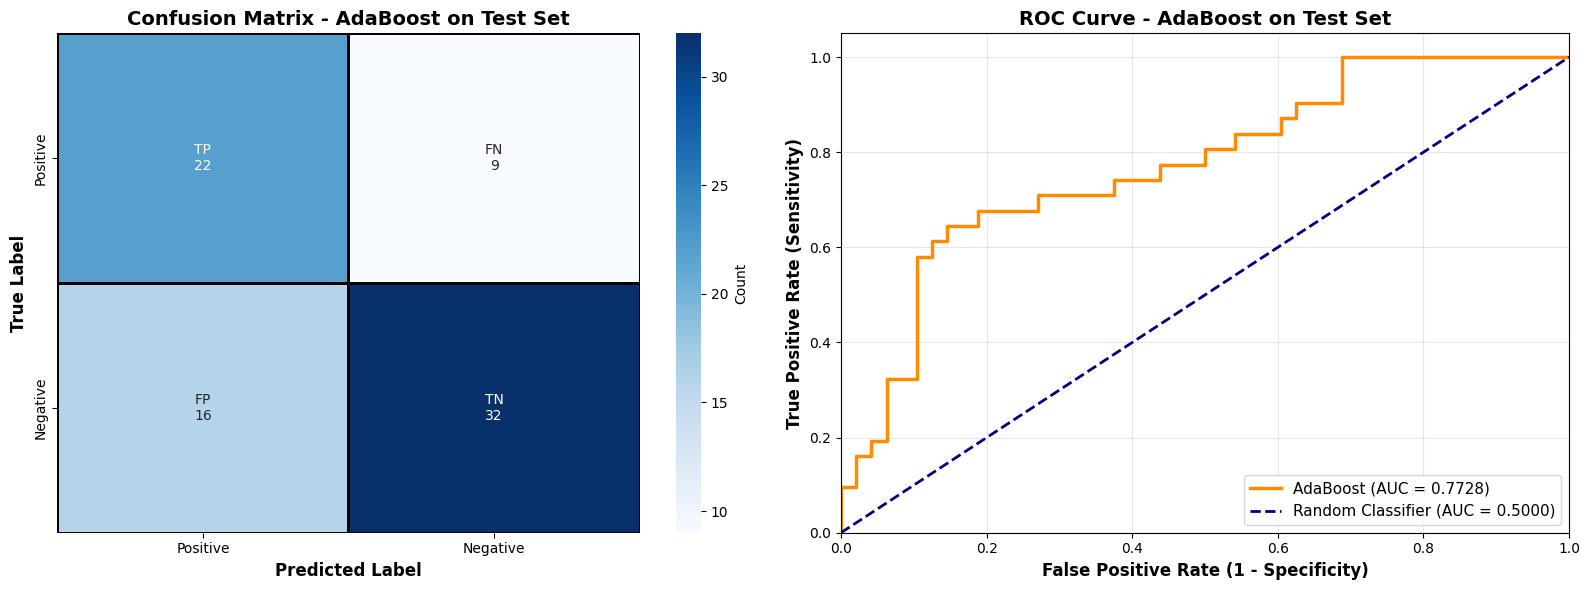

✓ Visualizations saved to 'ada_test_evaluation.png'
✓ ROC curve data saved to 'ada_test_roc_data.csv'

SAVING PREDICTIONS
✓ Predictions saved to 'ada_test_predictions.csv'

ADABOOST MODEL EVALUATION COMPLETED

All results have been saved successfully.


In [19]:
# ============================================================================
# AdaBoost Model Development and Evaluation
# ============================================================================
# This section implements AdaBoost classifier with hyperparameter optimization
# Model is trained on ETB-selected features
# Evaluation includes 10-fold cross-validation on training set and test set performance
# ============================================================================

import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import (
    confusion_matrix, roc_auc_score, accuracy_score,
    matthews_corrcoef, roc_curve, auc, classification_report, make_scorer
)
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.early_stop import no_progress_loss
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("ADABOOST MODEL DEVELOPMENT AND EVALUATION")
print("=" * 80)

# ============================================================================
# Step 1: Load Data with ETB-Selected Features
# ============================================================================

print("\nLoading data with ETB-selected features...")

# Load training and test data
X_train_etb = pd.read_csv("X_train_etb_selected.csv")
Ytrain = pd.read_csv("Y_train.csv").values.ravel()
Xtest_processed = pd.read_csv("X_test_processed.csv")
Ytest = pd.read_csv("Y_test.csv").values.ravel()

# Load ETB-selected features
etb_selected_features = pd.read_csv('etb_selected_features.csv')['Selected_Features'].tolist()
X_test_etb = Xtest_processed[etb_selected_features]

print(f"Training set: {X_train_etb.shape}")
print(f"Test set: {X_test_etb.shape}")
print(f"Training labels distribution: {np.bincount(Ytrain)}")
print(f"Test labels distribution: {np.bincount(Ytest)}")

# Set random seed
RANDOM_SEED = 1
np.random.seed(RANDOM_SEED)

# ============================================================================
# Step 2: Hyperparameter Optimization Setup
# ============================================================================

print("\n" + "=" * 80)
print("HYPERPARAMETER OPTIMIZATION SETUP")
print("=" * 80)

# Define objective function for hyperparameter optimization
def hyperopt_objective(params):
    """
    Objective function for AdaBoost hyperparameter optimization
    Returns negative MCC from 10-fold cross-validation
    """
    base_estimator = DecisionTreeClassifier(
        max_depth=int(params['base_estimator_max_depth']),
        random_state=RANDOM_SEED
    )
    
    ada_model = AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        algorithm=params['algorithm'],
        random_state=RANDOM_SEED
    )
    
    cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
    cv_results = cross_validate(
        ada_model,
        X_train_etb,
        Ytrain,
        cv=cv,
        scoring='matthews_corrcoef',
        n_jobs=-1,
        error_score='raise'
    )
    
    return -np.mean(cv_results['test_score'])

# Define hyperparameter search space
param_space_ada = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
    'learning_rate': hp.quniform('learning_rate', 0.5, 1.0, 0.01),
    'algorithm': hp.choice('algorithm', ['SAMME', 'SAMME.R']),
    'base_estimator_max_depth': hp.quniform('base_estimator_max_depth', 1, 5, 1)
}

# Define optimization process
def optimize_hyperparameters_ada(max_evals=250):
    """
    Perform hyperparameter optimization for AdaBoost
    
    Args:
        max_evals: Maximum number of evaluations
        
    Returns:
        best_params: Best hyperparameters found
        trials: Optimization trials history
    """
    trials = Trials()
    early_stop_fn = no_progress_loss(100)
    
    print(f"\nStarting AdaBoost hyperparameter optimization...")
    print(f"Maximum evaluations: {max_evals}")
    print(f"Optimization metric: Matthews Correlation Coefficient (MCC)")
    print(f"Cross-validation: 10-fold")
    
    params_best = fmin(
        fn=hyperopt_objective,
        space=param_space_ada,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=trials,
        early_stop_fn=early_stop_fn,
        verbose=True
    )
    
    print("\n" + "=" * 80)
    print("OPTIMIZATION COMPLETED")
    print("=" * 80)
    print(f"\nBest params: {params_best}")
    
    return params_best, trials

# ============================================================================
# Step 3: Hyperparameter Optimization (Optional)
# ============================================================================
# Uncomment to run hyperparameter optimization

# print("\nNote: Hyperparameter optimization may take considerable time...")
# params_best, trials = optimize_hyperparameters_ada(max_evals=250)

# ============================================================================
# Step 4: Build Model with Best Parameters
# ============================================================================

print("\n" + "=" * 80)
print("BUILDING OPTIMIZED ADABOOST MODEL")
print("=" * 80)

# Best parameters from optimization
best_params_ada = {
    'n_estimators': 298,
    'learning_rate': 0.85,
    'algorithm': 'SAMME',
    'base_estimator_max_depth': 4
}

print("\nBest hyperparameters for AdaBoost:")
for param, value in best_params_ada.items():
    print(f"  {param}: {value}")

# Initialize AdaBoost with best parameters
ada_best = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=best_params_ada['base_estimator_max_depth'],
        random_state=RANDOM_SEED
    ),
    n_estimators=best_params_ada['n_estimators'],
    learning_rate=best_params_ada['learning_rate'],
    algorithm=best_params_ada['algorithm'],
    random_state=RANDOM_SEED
)

# ============================================================================
# Step 5: 10-Fold Cross-Validation on Training Set
# ============================================================================

print("\n" + "=" * 80)
print("10-FOLD CROSS-VALIDATION EVALUATION (TRAINING SET)")
print("=" * 80)

# Define custom scoring functions
def sensitivity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Define scoring metrics
scoring = {
    'AUC': 'roc_auc',
    'ACC': 'accuracy',
    'SEN': make_scorer(sensitivity_score),
    'SPE': make_scorer(specificity_score),
    'MCC': make_scorer(matthews_corrcoef)
}

# Perform 10-fold cross-validation
print("\nPerforming 10-fold cross-validation on training set...")
cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
cv_results_ada = cross_validate(
    ada_best,
    X_train_etb,
    Ytrain,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

# Calculate mean and std for each metric
cv_summary_ada = pd.DataFrame({
    'Metric': ['AUC', 'ACC', 'SEN', 'SPE', 'MCC'],
    'Mean': [
        cv_results_ada['test_AUC'].mean(),
        cv_results_ada['test_ACC'].mean(),
        cv_results_ada['test_SEN'].mean(),
        cv_results_ada['test_SPE'].mean(),
        cv_results_ada['test_MCC'].mean()
    ],
    'Std': [
        cv_results_ada['test_AUC'].std(),
        cv_results_ada['test_ACC'].std(),
        cv_results_ada['test_SEN'].std(),
        cv_results_ada['test_SPE'].std(),
        cv_results_ada['test_MCC'].std()
    ]
})

print("\n10-Fold Cross-Validation Results (Training Set):")
print("=" * 60)
for idx, row in cv_summary_ada.iterrows():
    print(f"{row['Metric']}: {row['Mean']:.4f} ± {row['Std']:.4f}")
print("=" * 60)

# Save CV results
cv_summary_ada.to_csv('ada_cv_results.csv', index=False)
print("\n✓ Cross-validation results saved to 'ada_cv_results.csv'")

# ============================================================================
# Step 6: Train Model on Full Training Set
# ============================================================================

print("\n" + "=" * 80)
print("TRAINING ADABOOST MODEL")
print("=" * 80)

print("\nTraining AdaBoost on full training set...")
ada_best.fit(X_train_etb, Ytrain)
print("✓ Model training completed")

# Save the trained model
joblib.dump(ada_best, 'ada_optimized_model.pkl')
print("✓ Model saved to 'ada_optimized_model.pkl'")

# Save best parameters
params_ada_df = pd.DataFrame([best_params_ada])
params_ada_df.to_csv('ada_best_parameters.csv', index=False)
print("✓ Best parameters saved to 'ada_best_parameters.csv'")

# ============================================================================
# Step 7: Test Set Evaluation
# ============================================================================

print("\n" + "=" * 80)
print("TEST SET EVALUATION")
print("=" * 80)

print("\nMaking predictions on test set...")

# Get predictions and prediction probabilities
y_test_pred = ada_best.predict(X_test_etb)
y_test_proba = ada_best.predict_proba(X_test_etb)[:, 1]

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(Ytest, y_test_pred).ravel()

# Calculate all metrics
test_auc = roc_auc_score(Ytest, y_test_proba)
test_acc = accuracy_score(Ytest, y_test_pred)
test_sen = tp / (tp + fn)
test_spe = tn / (tn + fp)
test_mcc = matthews_corrcoef(Ytest, y_test_pred)

# Create performance summary
print("\nAdaBoost Test Set Performance:")
print("=" * 60)
print(f"AUC:         {test_auc:.4f}")
print(f"Accuracy:    {test_acc:.4f}")
print(f"Sensitivity: {test_sen:.4f}")
print(f"Specificity: {test_spe:.4f}")
print(f"MCC:         {test_mcc:.4f}")
print("=" * 60)

# Confusion matrix details
print("\nConfusion Matrix:")
print("=" * 60)
print(f"True Positives (TP):  {tp}")
print(f"False Negatives (FN): {fn}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN):  {tn}")
print("=" * 60)

# Save test performance metrics
test_metrics_df = pd.DataFrame({
    'Metric': ['AUC', 'ACC', 'SEN', 'SPE', 'MCC'],
    'Value': [test_auc, test_acc, test_sen, test_spe, test_mcc]
})
test_metrics_df.to_csv('ada_test_performance_metrics.csv', index=False)
print("\n✓ Test metrics saved to 'ada_test_performance_metrics.csv'")

# Save confusion matrix
confusion_df = pd.DataFrame({
    'TP': [tp],
    'FN': [fn],
    'FP': [fp],
    'TN': [tn]
})
confusion_df.to_csv('ada_test_confusion_matrix.csv', index=False)
print("✓ Confusion matrix saved to 'ada_test_confusion_matrix.csv'")

# ============================================================================
# Step 8: Visualizations
# ============================================================================

print("\n" + "=" * 80)
print("GENERATING VISUALIZATIONS")
print("=" * 80)

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Confusion Matrix Heatmap
cm = np.array([[tp, fn], [fp, tn]])
cm_display = np.array([['TP', 'FN'], ['FP', 'TN']])
annotations = np.empty_like(cm_display, dtype=object)
for i in range(2):
    for j in range(2):
        annotations[i, j] = f'{cm_display[i, j]}\n{cm[i, j]}'

sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'],
            cbar_kws={'label': 'Count'},
            linewidths=2, linecolor='black',
            ax=axes[0])
axes[0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[0].set_title('Confusion Matrix - AdaBoost on Test Set', fontsize=14, fontweight='bold')

# Plot 2: ROC Curve
fpr, tpr, thresholds = roc_curve(Ytest, y_test_proba)
roc_auc = auc(fpr, tpr)

axes[1].plot(fpr, tpr, color='darkorange', lw=2.5,
            label=f'AdaBoost (AUC = {roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
            label='Random Classifier (AUC = 0.5000)')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('True Positive Rate (Sensitivity)', fontsize=12, fontweight='bold')
axes[1].set_title('ROC Curve - AdaBoost on Test Set', fontsize=14, fontweight='bold')
axes[1].legend(loc="lower right", fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('ada_test_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualizations saved to 'ada_test_evaluation.png'")

# Save ROC curve data
roc_data = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr,
    'Threshold': thresholds
})
roc_data.to_csv('ada_test_roc_data.csv', index=False)
print("✓ ROC curve data saved to 'ada_test_roc_data.csv'")

# ============================================================================
# Step 9: Save Predictions
# ============================================================================

print("\n" + "=" * 80)
print("SAVING PREDICTIONS")
print("=" * 80)

# Create predictions DataFrame
predictions_df = pd.DataFrame({
    'True_Label': Ytest,
    'Predicted_Label': y_test_pred,
    'Prediction_Probability': y_test_proba
})

predictions_df.to_csv('ada_test_predictions.csv', index=False)
print("✓ Predictions saved to 'ada_test_predictions.csv'")

print("\n" + "=" * 80)
print("ADABOOST MODEL EVALUATION COMPLETED")
print("=" * 80)
print("\nAll results have been saved successfully.")

GBDT MODEL DEVELOPMENT AND EVALUATION

Loading data with ETB-selected features...
Training set: (313, 35)
Test set: (79, 35)
Training labels distribution: [163 150]
Test labels distribution: [48 31]

HYPERPARAMETER OPTIMIZATION SETUP

BUILDING OPTIMIZED GBDT MODEL

Best hyperparameters for GBDT:
  n_estimators: 196
  learning_rate: 0.35000000000000003
  criterion: friedman_mse
  max_depth: 2
  max_features: 8
  subsample: 0.59

10-FOLD CROSS-VALIDATION EVALUATION (TRAINING SET)

Performing 10-fold cross-validation on training set...

10-Fold Cross-Validation Results (Training Set):
AUC: 0.8046 ± 0.0696
ACC: 0.7572 ± 0.0804
SEN: 0.7399 ± 0.0943
SPE: 0.7856 ± 0.1051
MCC: 0.5236 ± 0.1544

✓ Cross-validation results saved to 'gbdt_cv_results.csv'

TRAINING GBDT MODEL

Training GBDT on full training set...
✓ Model training completed
✓ Model saved to 'gbdt_optimized_model.pkl'
✓ Best parameters saved to 'gbdt_best_parameters.csv'

TEST SET EVALUATION

Making predictions on test set...

GBDT 

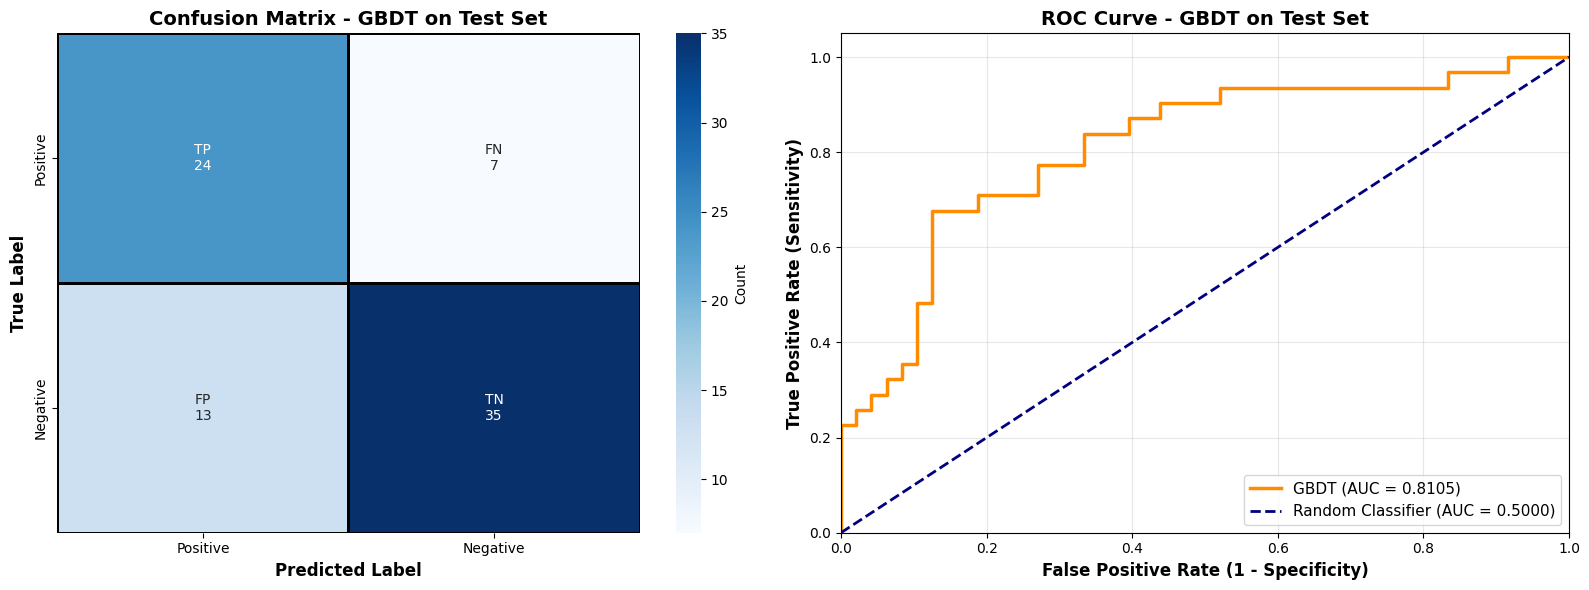

✓ Visualizations saved to 'gbdt_test_evaluation.png'
✓ ROC curve data saved to 'gbdt_test_roc_data.csv'

SAVING PREDICTIONS
✓ Predictions saved to 'gbdt_test_predictions.csv'

GBDT MODEL EVALUATION COMPLETED

All results have been saved successfully.


In [21]:
# ============================================================================
# GBDT Model Development and Evaluation
# ============================================================================
# This section implements Gradient Boosting Decision Tree classifier with hyperparameter optimization
# Model is trained on ETB-selected features
# Evaluation includes 10-fold cross-validation on training set and test set performance
# ============================================================================

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import (
    confusion_matrix, roc_auc_score, accuracy_score,
    matthews_corrcoef, roc_curve, auc, classification_report, make_scorer
)
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.early_stop import no_progress_loss
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("GBDT MODEL DEVELOPMENT AND EVALUATION")
print("=" * 80)

# ============================================================================
# Step 1: Load Data with ETB-Selected Features
# ============================================================================

print("\nLoading data with ETB-selected features...")

# Load training and test data
X_train_etb = pd.read_csv("X_train_etb_selected.csv")
Ytrain = pd.read_csv("Y_train.csv").values.ravel()
Xtest_processed = pd.read_csv("X_test_processed.csv")
Ytest = pd.read_csv("Y_test.csv").values.ravel()

# Load ETB-selected features
etb_selected_features = pd.read_csv('etb_selected_features.csv')['Selected_Features'].tolist()
X_test_etb = Xtest_processed[etb_selected_features]

print(f"Training set: {X_train_etb.shape}")
print(f"Test set: {X_test_etb.shape}")
print(f"Training labels distribution: {np.bincount(Ytrain)}")
print(f"Test labels distribution: {np.bincount(Ytest)}")

# Set random seed
RANDOM_SEED = 1
np.random.seed(RANDOM_SEED)

# ============================================================================
# Step 2: Hyperparameter Optimization Setup
# ============================================================================

print("\n" + "=" * 80)
print("HYPERPARAMETER OPTIMIZATION SETUP")
print("=" * 80)

# Define objective function for hyperparameter optimization
def hyperopt_objective(params):
    """
    Objective function for GBDT hyperparameter optimization
    Returns negative MCC from 10-fold cross-validation
    """
    # Handle max_features parameter
    max_features_options = ["sqrt", "log2"] + list(range(2, 30))
    max_features = max_features_options[params["max_features"]]
    
    gbdt_model = GradientBoostingClassifier(
        n_estimators=int(params["n_estimators"]),
        learning_rate=params["learning_rate"],
        criterion=params["criterion"],
        max_depth=int(params["max_depth"]),
        max_features=max_features,
        subsample=params["subsample"],
        random_state=RANDOM_SEED,
        verbose=0
    )
    
    cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
    cv_results = cross_validate(
        gbdt_model,
        X_train_etb,
        Ytrain,
        cv=cv,
        scoring="matthews_corrcoef",
        n_jobs=-1,
        error_score="raise"
    )
    
    return -np.mean(cv_results["test_score"])

# Define hyperparameter search space
param_space_gbdt = {
    'n_estimators': hp.quniform("n_estimators", 40, 300, 1),
    "learning_rate": hp.quniform("learning_rate", 0.1, 1.0, 0.01),
    "criterion": hp.choice("criterion", ["friedman_mse", "squared_error"]),
    "max_depth": hp.quniform("max_depth", 2, 10, 1),
    "subsample": hp.quniform("subsample", 0.1, 1.0, 0.01),
    "max_features": hp.choice("max_features", list(range(len(["sqrt", "log2"] + list(range(2, 30))))))
}

# Define optimization process
def optimize_hyperparameters_gbdt(max_evals=250):
    """
    Perform hyperparameter optimization for GBDT
    
    Args:
        max_evals: Maximum number of evaluations
        
    Returns:
        best_params: Best hyperparameters found
        trials: Optimization trials history
    """
    trials = Trials()
    early_stop_fn = no_progress_loss(400)
    
    print(f"\nStarting GBDT hyperparameter optimization...")
    print(f"Maximum evaluations: {max_evals}")
    print(f"Optimization metric: Matthews Correlation Coefficient (MCC)")
    print(f"Cross-validation: 10-fold")
    
    params_best = fmin(
        fn=hyperopt_objective,
        space=param_space_gbdt,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=trials,
        early_stop_fn=early_stop_fn,
        verbose=True
    )
    
    print("\n" + "=" * 80)
    print("OPTIMIZATION COMPLETED")
    print("=" * 80)
    print(f"\nBest params: {params_best}")
    
    return params_best, trials

# ============================================================================
# Step 3: Hyperparameter Optimization (Optional)
# ============================================================================
# Uncomment to run hyperparameter optimization

# print("\nNote: Hyperparameter optimization may take considerable time...")
# params_best, trials = optimize_hyperparameters_gbdt(max_evals=250)

# ============================================================================
# Step 4: Build Model with Best Parameters
# ============================================================================

print("\n" + "=" * 80)
print("BUILDING OPTIMIZED GBDT MODEL")
print("=" * 80)

# Best parameters from optimization
best_params_gbdt = {
    'n_estimators': 196,
    'learning_rate': 0.35000000000000003,
    'criterion': 'friedman_mse',
    'max_depth': 2,
    'max_features': 8,
    'subsample': 0.59
}

print("\nBest hyperparameters for GBDT:")
for param, value in best_params_gbdt.items():
    print(f"  {param}: {value}")

# Initialize GBDT with best parameters
gbdt_best = GradientBoostingClassifier(
    n_estimators=best_params_gbdt['n_estimators'],
    learning_rate=best_params_gbdt['learning_rate'],
    criterion=best_params_gbdt['criterion'],
    max_depth=best_params_gbdt['max_depth'],
    max_features=best_params_gbdt['max_features'],
    subsample=best_params_gbdt['subsample'],
    random_state=RANDOM_SEED,
    verbose=0
)

# ============================================================================
# Step 5: 10-Fold Cross-Validation on Training Set
# ============================================================================

print("\n" + "=" * 80)
print("10-FOLD CROSS-VALIDATION EVALUATION (TRAINING SET)")
print("=" * 80)

# Define custom scoring functions
def sensitivity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Define scoring metrics
scoring = {
    'AUC': 'roc_auc',
    'ACC': 'accuracy',
    'SEN': make_scorer(sensitivity_score),
    'SPE': make_scorer(specificity_score),
    'MCC': make_scorer(matthews_corrcoef)
}

# Perform 10-fold cross-validation
print("\nPerforming 10-fold cross-validation on training set...")
cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
cv_results_gbdt = cross_validate(
    gbdt_best,
    X_train_etb,
    Ytrain,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

# Calculate mean and std for each metric
cv_summary_gbdt = pd.DataFrame({
    'Metric': ['AUC', 'ACC', 'SEN', 'SPE', 'MCC'],
    'Mean': [
        cv_results_gbdt['test_AUC'].mean(),
        cv_results_gbdt['test_ACC'].mean(),
        cv_results_gbdt['test_SEN'].mean(),
        cv_results_gbdt['test_SPE'].mean(),
        cv_results_gbdt['test_MCC'].mean()
    ],
    'Std': [
        cv_results_gbdt['test_AUC'].std(),
        cv_results_gbdt['test_ACC'].std(),
        cv_results_gbdt['test_SEN'].std(),
        cv_results_gbdt['test_SPE'].std(),
        cv_results_gbdt['test_MCC'].std()
    ]
})

print("\n10-Fold Cross-Validation Results (Training Set):")
print("=" * 60)
for idx, row in cv_summary_gbdt.iterrows():
    print(f"{row['Metric']}: {row['Mean']:.4f} ± {row['Std']:.4f}")
print("=" * 60)

# Save CV results
cv_summary_gbdt.to_csv('gbdt_cv_results.csv', index=False)
print("\n✓ Cross-validation results saved to 'gbdt_cv_results.csv'")

# ============================================================================
# Step 6: Train Model on Full Training Set
# ============================================================================

print("\n" + "=" * 80)
print("TRAINING GBDT MODEL")
print("=" * 80)

print("\nTraining GBDT on full training set...")
gbdt_best.fit(X_train_etb, Ytrain)
print("✓ Model training completed")

# Save the trained model
joblib.dump(gbdt_best, 'gbdt_optimized_model.pkl')
print("✓ Model saved to 'gbdt_optimized_model.pkl'")

# Save best parameters
params_gbdt_df = pd.DataFrame([best_params_gbdt])
params_gbdt_df.to_csv('gbdt_best_parameters.csv', index=False)
print("✓ Best parameters saved to 'gbdt_best_parameters.csv'")

# ============================================================================
# Step 7: Test Set Evaluation
# ============================================================================

print("\n" + "=" * 80)
print("TEST SET EVALUATION")
print("=" * 80)

print("\nMaking predictions on test set...")

# Get predictions and prediction probabilities
y_test_pred = gbdt_best.predict(X_test_etb)
y_test_proba = gbdt_best.predict_proba(X_test_etb)[:, 1]

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(Ytest, y_test_pred).ravel()

# Calculate all metrics
test_auc = roc_auc_score(Ytest, y_test_proba)
test_acc = accuracy_score(Ytest, y_test_pred)
test_sen = tp / (tp + fn)
test_spe = tn / (tn + fp)
test_mcc = matthews_corrcoef(Ytest, y_test_pred)

# Create performance summary
print("\nGBDT Test Set Performance:")
print("=" * 60)
print(f"AUC:         {test_auc:.4f}")
print(f"Accuracy:    {test_acc:.4f}")
print(f"Sensitivity: {test_sen:.4f}")
print(f"Specificity: {test_spe:.4f}")
print(f"MCC:         {test_mcc:.4f}")
print("=" * 60)

# Confusion matrix details
print("\nConfusion Matrix:")
print("=" * 60)
print(f"True Positives (TP):  {tp}")
print(f"False Negatives (FN): {fn}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN):  {tn}")
print("=" * 60)

# Save test performance metrics
test_metrics_df = pd.DataFrame({
    'Metric': ['AUC', 'ACC', 'SEN', 'SPE', 'MCC'],
    'Value': [test_auc, test_acc, test_sen, test_spe, test_mcc]
})
test_metrics_df.to_csv('gbdt_test_performance_metrics.csv', index=False)
print("\n✓ Test metrics saved to 'gbdt_test_performance_metrics.csv'")

# Save confusion matrix
confusion_df = pd.DataFrame({
    'TP': [tp],
    'FN': [fn],
    'FP': [fp],
    'TN': [tn]
})
confusion_df.to_csv('gbdt_test_confusion_matrix.csv', index=False)
print("✓ Confusion matrix saved to 'gbdt_test_confusion_matrix.csv'")

# ============================================================================
# Step 8: Visualizations
# ============================================================================

print("\n" + "=" * 80)
print("GENERATING VISUALIZATIONS")
print("=" * 80)

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Confusion Matrix Heatmap
cm = np.array([[tp, fn], [fp, tn]])
cm_display = np.array([['TP', 'FN'], ['FP', 'TN']])
annotations = np.empty_like(cm_display, dtype=object)
for i in range(2):
    for j in range(2):
        annotations[i, j] = f'{cm_display[i, j]}\n{cm[i, j]}'

sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'],
            cbar_kws={'label': 'Count'},
            linewidths=2, linecolor='black',
            ax=axes[0])
axes[0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[0].set_title('Confusion Matrix - GBDT on Test Set', fontsize=14, fontweight='bold')

# Plot 2: ROC Curve
fpr, tpr, thresholds = roc_curve(Ytest, y_test_proba)
roc_auc = auc(fpr, tpr)

axes[1].plot(fpr, tpr, color='darkorange', lw=2.5,
            label=f'GBDT (AUC = {roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
            label='Random Classifier (AUC = 0.5000)')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('True Positive Rate (Sensitivity)', fontsize=12, fontweight='bold')
axes[1].set_title('ROC Curve - GBDT on Test Set', fontsize=14, fontweight='bold')
axes[1].legend(loc="lower right", fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('gbdt_test_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualizations saved to 'gbdt_test_evaluation.png'")

# Save ROC curve data
roc_data = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr,
    'Threshold': thresholds
})
roc_data.to_csv('gbdt_test_roc_data.csv', index=False)
print("✓ ROC curve data saved to 'gbdt_test_roc_data.csv'")

# ============================================================================
# Step 9: Save Predictions
# ============================================================================

print("\n" + "=" * 80)
print("SAVING PREDICTIONS")
print("=" * 80)

# Create predictions DataFrame
predictions_df = pd.DataFrame({
    'True_Label': Ytest,
    'Predicted_Label': y_test_pred,
    'Prediction_Probability': y_test_proba
})

predictions_df.to_csv('gbdt_test_predictions.csv', index=False)
print("✓ Predictions saved to 'gbdt_test_predictions.csv'")

print("\n" + "=" * 80)
print("GBDT MODEL EVALUATION COMPLETED")
print("=" * 80)
print("\nAll results have been saved successfully.")